# Contents:
  - [Exploratory Data Analytics](#index1)
      - Dataset Exploratory
      - Check for imbalanced Data
      - Check for missing values
      - Check the data distribution of each column
      - Feature selection based on missing values and correlations
  - [Predictive Models](#index2)
    - [**Logistic Regression**](#index4)
    - [**Decision Tree**](#index5)
    - [**Random Forest**](#index6)
    
   For each predictive model's part, several steps are included:
    1. Feature encoding for categorical features
    2. Apply **SMOTE** method to deal with the imbalanced data
         - Using **mean** value to fill in the missing values
         - Using **median** value to fill in the missing values
    4. Train the model and make prediction, marked as `performance before feature selection`
    5. Apply **Genetic Algorithm** for feature selection, then use the selected features for the training of model, make prediction and marked as `performance after feature selection`
    6. Compare the performance of the models before and after feature selection
  - [Result Analysis](#index3)

# <span id='index1'>I. Exploratory Data Analytics</span>

In [1]:
# Import all the necessary packages

# Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

# Scikit-learn Packages
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py)

In [11]:
# Read in the dataset
pd.read_csv(r"C:\Users\Desktop\Dataset\MIMIC_IV.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Desktop\\Dataset\\MIMIC_IV.csv'

In [5]:
# Briefly look at the dataset
pd.options.display.max_columns = 60 # To completely show the all 60 columns in the dataset
r, c = df.shape
print('There are ' + str(r) + ' rows and ' + str(c) + ' columns in the dataset')

NameError: name 'df' is not defined

In [5]:
df.head() # Show the top five records in the dataframe

gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  mbp_min  \
0      M  54.550390            93.0           115.0       103.500000     57.0   
1      M  86.324653            50.0            61.0        54.333333     61.0   
2      M  40.270146            70.0           105.0        83.434783     66.0   
3      M  73.383547            68.0            98.0        83.880000     74.0   
4      M  70.724748            77.0            95.0        85.771429     30.0   

   mbp_max   mbp_mean  sbp_min  sbp_max    sbp_mean  dbp_min  dbp_max  \
0    100.0  82.733333     87.0    163.0  125.433333     30.0     83.0   
1     93.0  71.695652     95.0    141.0  109.434783     49.0     85.0   
2     92.0  76.695652     94.0    129.0  111.130435     55.0     81.0   
3    101.0  84.694444     83.0    148.0  122.166667     53.0     93.0   
4     90.0  62.657143     52.0    129.0   90.028571     25.0     80.0   

    dbp_mean  temperature_min  temperature_max  temperature_mean  lactate_min  \
0  65.600000            36.78            37.56         37.055000          0.9   
1  59.652174            36.39            36.94         36.798000          NaN   
2  67.173913            36.50            37.28         36.796667          NaN   
3  66.722222            36.67            36.83         36.750000          2.3   
4  50.771429            36.28            38.11         37.022857          0.8   

   lactate_max  ph_min  ph_max  chloride_min  chloride_max  calcium_min  \
0          8.2    7.27    7.47         104.0         110.0         1.01   
1          NaN     NaN     NaN           NaN           NaN          NaN   
2          NaN     NaN     NaN           NaN           NaN          NaN   
3          2.3    7.35    7.35           NaN           NaN          NaN   
4          1.2    7.23    7.33           NaN           NaN          NaN   

   calcium_max  sodium_min  sodium_max  glucose_min  glucose_max  wbc_min  \
0         1.11       136.0       139.0        112.0        122.0     11.6   
1          NaN         NaN         NaN        103.0        356.0      7.4   
2          NaN         NaN         NaN        108.0        115.0      4.3   
3          NaN         NaN         NaN        149.0        156.0     13.0   
4          NaN         NaN         NaN        102.0        104.0      9.4   

   wbc_max  creatinine_min  creatinine_max  hemoglobin_min  hemoglobin_max  \
0     11.6             1.2             1.7             8.9             8.9   
1      8.4             1.4             1.5            12.6            13.3   
2      7.0             0.6             0.7             6.9             7.1   
3     18.1             1.3             1.6            11.8            12.8   
4     11.7             3.4             4.0            10.2            12.7   

   total_protein_max  total_protein_min  pt_min  pt_max  alt_max  alt_min  \
0                NaN                NaN    13.2    13.7      NaN      NaN   
1                NaN                NaN     9.9    11.1      NaN      NaN   
2                NaN                NaN    15.2    15.3     35.0     35.0   
3                NaN                NaN     NaN     NaN      NaN      NaN   
4                NaN                NaN    12.6    13.4     61.0     45.0   

   alp_max  alp_min  ast_min  ast_max  bilirubin_total_max  \
0      NaN      NaN      NaN      NaN                  NaN   
1      NaN      NaN      NaN      NaN                  NaN   
2     57.0     57.0     54.0     54.0                  1.1   
3      NaN      NaN      NaN      NaN                  NaN   
4    139.0    109.0    126.0    186.0                  0.9   

   bilirubin_total_min  bilirubin_direct_max  bilirubin_direct_min  \
0                  NaN                   NaN                   NaN   
1                  NaN                   NaN                   NaN   
2                  1.1                   NaN                   NaN   
3                  NaN                   NaN                   NaN   
4                  0

In [6]:
df.columns # Briefly look at the columns in the dataframe

Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'chloride_min', 'chloride_max', 'calcium_min', 'calcium_max',
       'sodium_min', 'sodium_max', 'glucose_min', 'glucose_max', 'wbc_min',
       'wbc_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min',
       'hemoglobin_max', 'total_protein_max', 'total_protein_min', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min',
       'bilirubin_direct_max', 'bilirubin_direct_min',
       'bilirubin_indirect_max', 'bilirubin_indirect_min', 'urineoutput',
       'sofa_respiration', 'sofa_coagulation', 'sofa_liver',
       'sofa_cardiovascular', 'sofa_cns', 'sofa_renal',
       'charls

## Distribution of positive records and negative records

From this part we notice that the dataset is **imbalanced**, the ratio of postive records to negative records is about `35:1`, hence it is necessary to apply oversampling methods to deal with the imbalance problem.

Number of True:  35160
Number of False:  1329


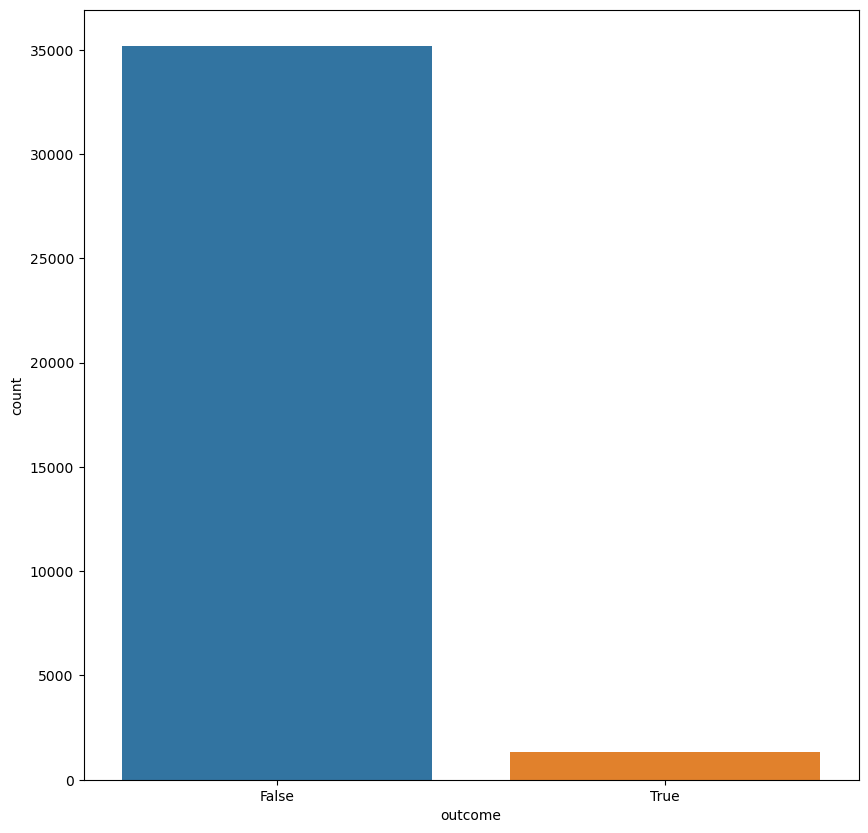

In [7]:
fig, ax = plt.subplots(figsize = (10,10))

ax = sns.countplot(x = df['outcome'], label = "Count")

t, f = df['outcome'].value_counts()
print('Number of True: ', t)
print('Number of False: ', f)

## Missing values and ratio of missing values in each column

In [8]:
columns_with_nan = df.columns[df.isnull().any()].tolist()
columns_with_nan

for columns in columns_with_nan:
    print(columns + ' has %.2f'% (100 * df[columns].isnull().value_counts()[1] / (df[columns].isnull().value_counts()[1] + df[columns].isnull().value_counts()[0])) + '% ' + 'missing values' )

heart_rate_min has 0.20% missing values
heart_rate_max has 0.20% missing values
heart_rate_mean has 0.20% missing values
mbp_min has 0.24% missing values
mbp_max has 0.24% missing values
mbp_mean has 0.24% missing values
sbp_min has 0.40% missing values
sbp_max has 0.40% missing values
sbp_mean has 0.40% missing values
dbp_min has 0.41% missing values
dbp_max has 0.41% missing values
dbp_mean has 0.41% missing values
temperature_min has 0.99% missing values
temperature_max has 0.99% missing values
temperature_mean has 0.99% missing values
lactate_min has 56.34% missing values
lactate_max has 56.34% missing values
ph_min has 48.31% missing values
ph_max has 48.31% missing values
chloride_min has 83.20% missing values
chloride_max has 83.20% missing values
calcium_min has 74.54% missing values
calcium_max has 74.54% missing values
sodium_min has 82.04% missing values
sodium_max has 82.04% missing values
glucose_min has 0.82% missing values
glucose_max has 0.82% missing values
wbc_min has

## Drop the columns with over 80% of missing values

In [9]:
for column in columns_with_nan:
    if (100 * df[column].isnull().value_counts()[1] / (df[column].isnull().value_counts()[1] + df[column].isnull().value_counts()[0])) > 80:
        df = df.drop(columns = [column])
        print(column + ' dropped.')
df

chloride_min dropped.
chloride_max dropped.
sodium_min dropped.
sodium_max dropped.
total_protein_max dropped.
total_protein_min dropped.
bilirubin_direct_max dropped.
bilirubin_direct_min dropped.
bilirubin_indirect_max dropped.
bilirubin_indirect_min dropped.


gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0          M  54.550390            93.0           115.0       103.500000   
1          M  86.324653            50.0            61.0        54.333333   
2          M  40.270146            70.0           105.0        83.434783   
3          M  73.383547            68.0            98.0        83.880000   
4          M  70.724748            77.0            95.0        85.771429   
...      ...        ...             ...             ...              ...   
36484      F  84.952721            59.0            80.0        68.538462   
36485      F  30.583263            59.0           104.0        79.954545   
36486      F  60.095765            71.0            94.0        82.625000   
36487      M  78.847051            63.0            86.0        72.836735   
36488      M  32.783457            86.0           103.0        94.000000   

       mbp_min  mbp_max    mbp_mean  sbp_min  sbp_max    sbp_mean  dbp_min  \
0         57.0    100.0   82.733333     87.0    163.0  125.433333     30.0   
1         61.0     93.0   71.695652     95.0    141.0  109.434783     49.0   
2         66.0     92.0   76.695652     94.0    129.0  111.130435     55.0   
3         74.0    101.0   84.694444     83.0    148.0  122.166667     53.0   
4         30.0     90.0   62.657143     52.0    129.0   90.028571     25.0   
...        ...      ...         ...      ...      ...         ...      ...   
36484      2.0     95.0   74.346154    109.0    152.0  128.076923     46.0   
36485     67.0     91.0   77.820000     94.0    140.0  114.416667     47.0   
36486     51.0     92.0   61.772727     90.0    120.0  104.608696     38.0   
36487    113.0    121.0  117.000000    148.0    219.0  165.500000     70.0   
36488     83.0    118.0   99.916667     97.0    176.0  144.375000     76.0   

       dbp_max   dbp_mean  temperature_min  temperature_max  temperature_mean  \
0         83.0  65.600000            36.78            37.56         37.055000   
1         85.0  59.652174            36.39            36.94         36.798000   
2         81.0  67.173913            36.50            37.28         36.796667   
3         93.0  66.722222            36.67            36.83         36.750000   
4         80.0  50.771429            36.28            38.11         37.022857   
...        ...        ...              ...              ...               ...   
36484     65.0  55.961538            35.39            36.00         35.676667   
36485     78.0  60.125000            36.67            37.28         37.112500   
36486     86.0  50.695652            36.67            37.44         37.016667   
36487     94.0  82.576923            36.67            37.00         36.834286   
36488    103.0  86.916667            36.44            37.72         36.861667   

       lactate_min  lactate_max  ph_min  ph_max  calcium_min  calcium_max  \
0              0.9          8.2    7.27    7.47         1.01         1.11   
1              NaN          NaN     NaN     NaN          NaN          NaN   
2              NaN          NaN     NaN     NaN          NaN          NaN   
3              2.3          2.3    7.35    7.35          NaN          NaN   
4              0.8          1.2    7.23    7.33          NaN          NaN   
...            ...          ...     ...     ...          ...          ...   
36484          2.2          2.8    7.28    7.39         1.10         1.18   
36485          NaN          NaN     NaN     NaN          NaN          NaN   
36486          NaN          NaN     NaN     NaN          NaN          NaN   
36487          NaN          NaN     NaN     NaN          NaN          NaN   
36488          1.7          2.6    7.43    7.44         0.93         1.02   

       glucose_min  glucose_max  wbc_min  wbc_max  creatinine_min  \
0            112.0        122.0     11.6     11.6             1.2   
1            103.0        356.0      7.4      8.4             1.4   
2            108.0        115.0      4.3      7.0  

## Calculate the correlation between each feature

In [10]:
corr = df.corr()

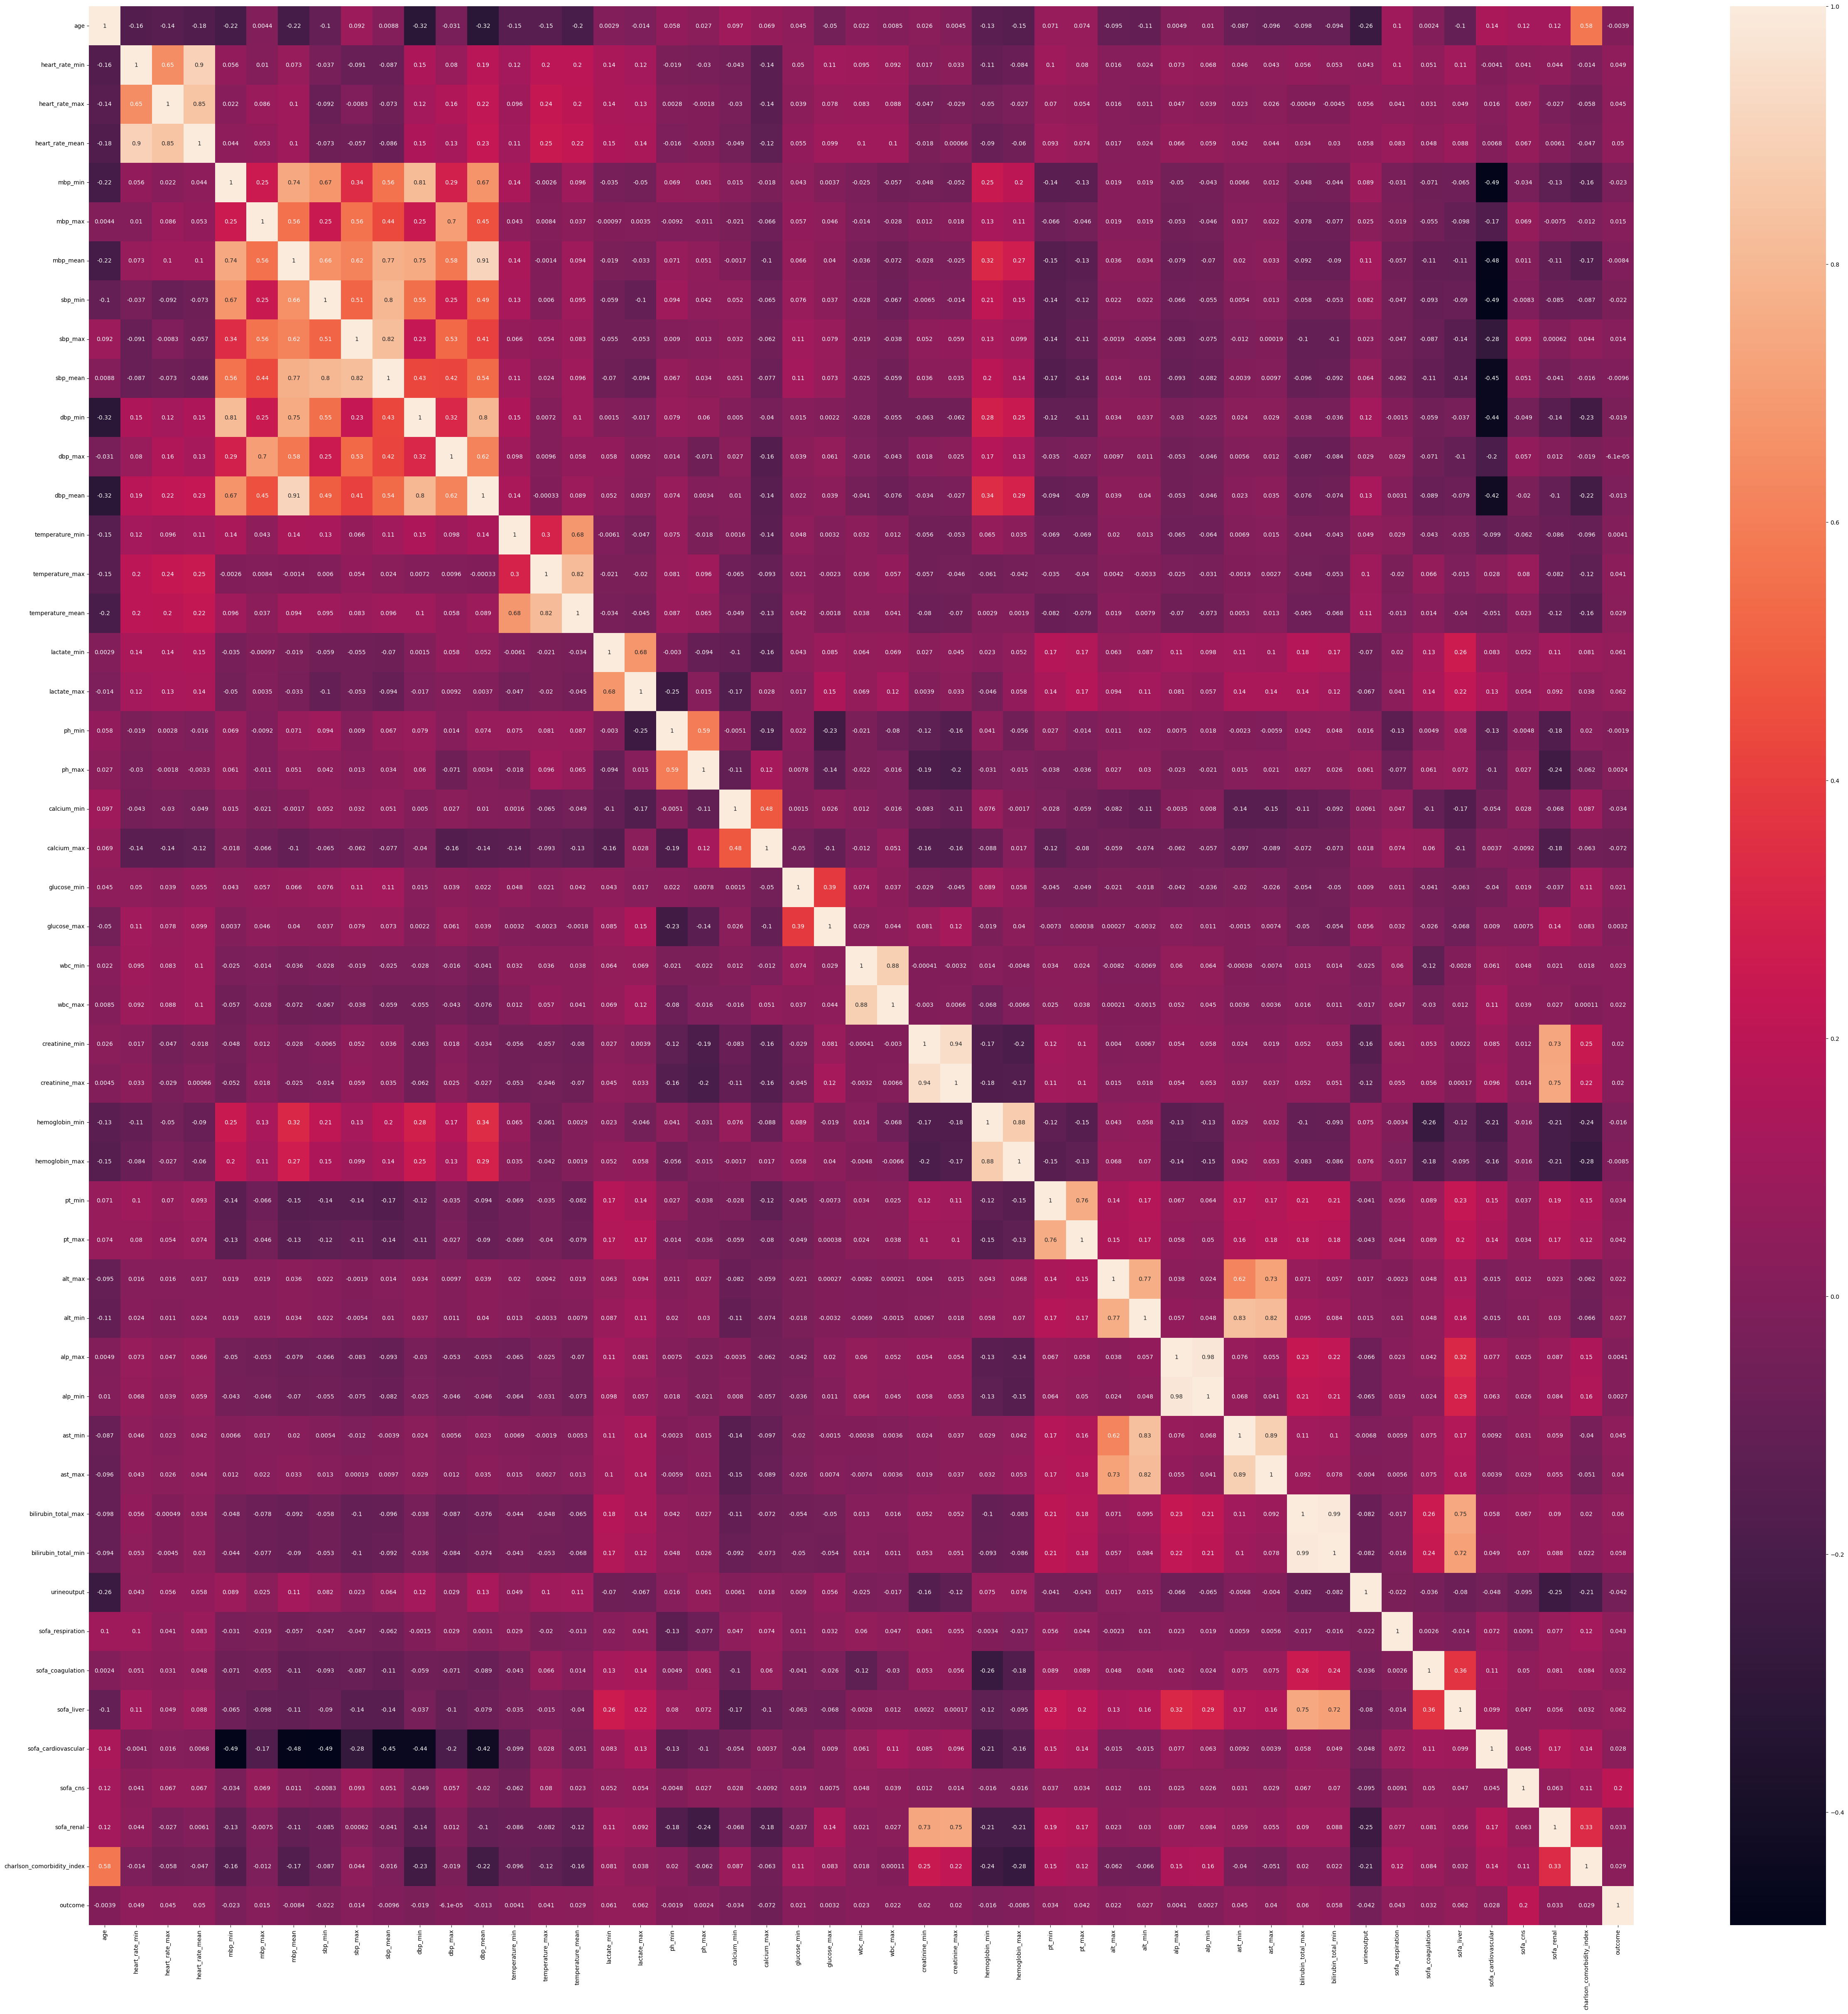

In [11]:
# Show the correlation heatmap
fig, ax = plt.subplots(figsize = (60, 60))
sns.heatmap(corr, annot = True, ax = ax)
plt.show()

## Drop features with high correlations

**threshold -** `0.95`

In [12]:
threshold = 0.95 # Set a threshold of 95% to drop those features with high correlation to reduce the number of features

highly_correlated = []
correlated_matrix = np.abs(corr) > threshold
for i in range(len(correlated_matrix.columns)):
    for j in range(i):
        if correlated_matrix.iloc[i, j]:
            colname = correlated_matrix.columns[i]
            highly_correlated.append(colname)
            
for h_c in highly_correlated:
    print(h_c + ' dropped.')
df = df.drop(highly_correlated, axis = 1)
df

alp_min dropped.
bilirubin_total_min dropped.


gender        age  heart_rate_min  heart_rate_max  heart_rate_mean  \
0          M  54.550390            93.0           115.0       103.500000   
1          M  86.324653            50.0            61.0        54.333333   
2          M  40.270146            70.0           105.0        83.434783   
3          M  73.383547            68.0            98.0        83.880000   
4          M  70.724748            77.0            95.0        85.771429   
...      ...        ...             ...             ...              ...   
36484      F  84.952721            59.0            80.0        68.538462   
36485      F  30.583263            59.0           104.0        79.954545   
36486      F  60.095765            71.0            94.0        82.625000   
36487      M  78.847051            63.0            86.0        72.836735   
36488      M  32.783457            86.0           103.0        94.000000   

       mbp_min  mbp_max    mbp_mean  sbp_min  sbp_max    sbp_mean  dbp_min  \
0         57.0    100.0   82.733333     87.0    163.0  125.433333     30.0   
1         61.0     93.0   71.695652     95.0    141.0  109.434783     49.0   
2         66.0     92.0   76.695652     94.0    129.0  111.130435     55.0   
3         74.0    101.0   84.694444     83.0    148.0  122.166667     53.0   
4         30.0     90.0   62.657143     52.0    129.0   90.028571     25.0   
...        ...      ...         ...      ...      ...         ...      ...   
36484      2.0     95.0   74.346154    109.0    152.0  128.076923     46.0   
36485     67.0     91.0   77.820000     94.0    140.0  114.416667     47.0   
36486     51.0     92.0   61.772727     90.0    120.0  104.608696     38.0   
36487    113.0    121.0  117.000000    148.0    219.0  165.500000     70.0   
36488     83.0    118.0   99.916667     97.0    176.0  144.375000     76.0   

       dbp_max   dbp_mean  temperature_min  temperature_max  temperature_mean  \
0         83.0  65.600000            36.78            37.56         37.055000   
1         85.0  59.652174            36.39            36.94         36.798000   
2         81.0  67.173913            36.50            37.28         36.796667   
3         93.0  66.722222            36.67            36.83         36.750000   
4         80.0  50.771429            36.28            38.11         37.022857   
...        ...        ...              ...              ...               ...   
36484     65.0  55.961538            35.39            36.00         35.676667   
36485     78.0  60.125000            36.67            37.28         37.112500   
36486     86.0  50.695652            36.67            37.44         37.016667   
36487     94.0  82.576923            36.67            37.00         36.834286   
36488    103.0  86.916667            36.44            37.72         36.861667   

       lactate_min  lactate_max  ph_min  ph_max  calcium_min  calcium_max  \
0              0.9          8.2    7.27    7.47         1.01         1.11   
1              NaN          NaN     NaN     NaN          NaN          NaN   
2              NaN          NaN     NaN     NaN          NaN          NaN   
3              2.3          2.3    7.35    7.35          NaN          NaN   
4              0.8          1.2    7.23    7.33          NaN          NaN   
...            ...          ...     ...     ...          ...          ...   
36484          2.2          2.8    7.28    7.39         1.10         1.18   
36485          NaN          NaN     NaN     NaN          NaN          NaN   
36486          NaN          NaN     NaN     NaN          NaN          NaN   
36487          NaN          NaN     NaN     NaN          NaN          NaN   
36488          1.7          2.6    7.43    7.44         0.93         1.02   

       glucose_min  glucose_max  wbc_min  wbc_max  creatinine_min  \
0            112.0        122.0     11.6     11.6             1.2   
1            103.0        356.0      7.4      8.4             1.4   
2            108.0        115.0      4.3      7.0  

## Check the data distribution of each column

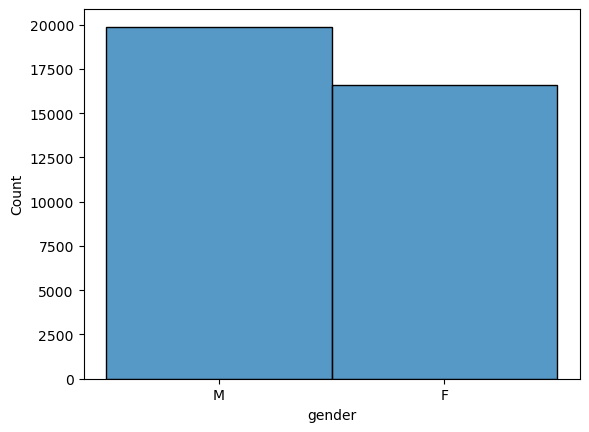

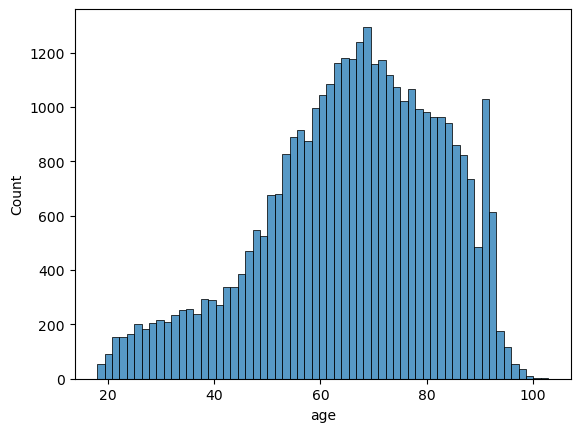

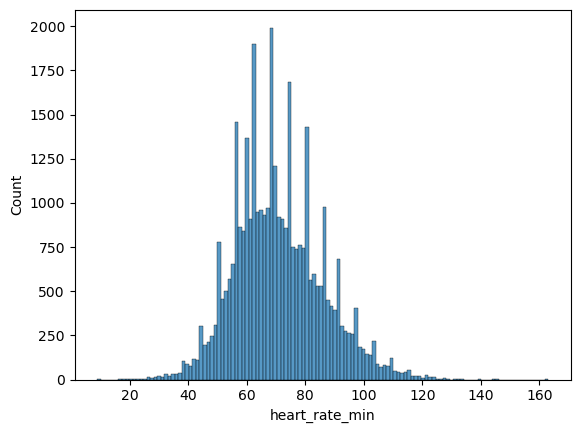

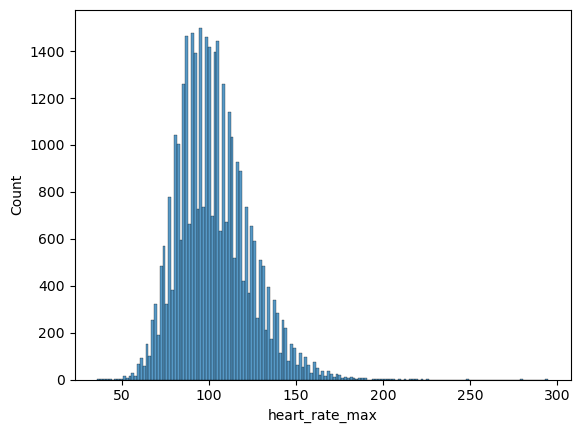

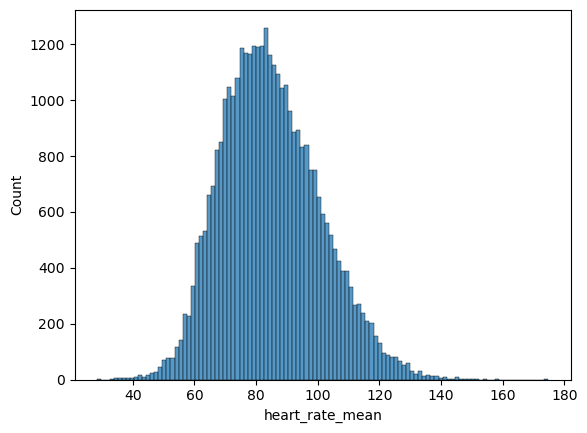

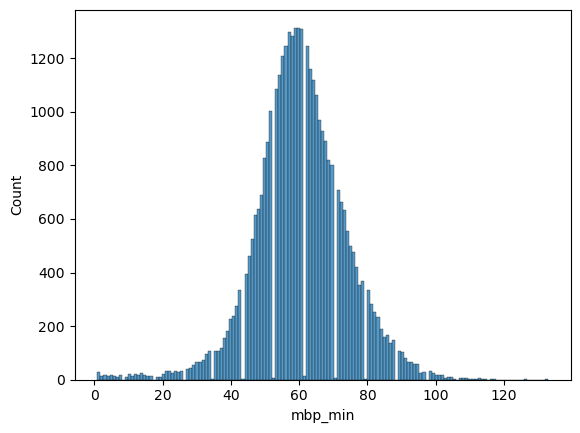

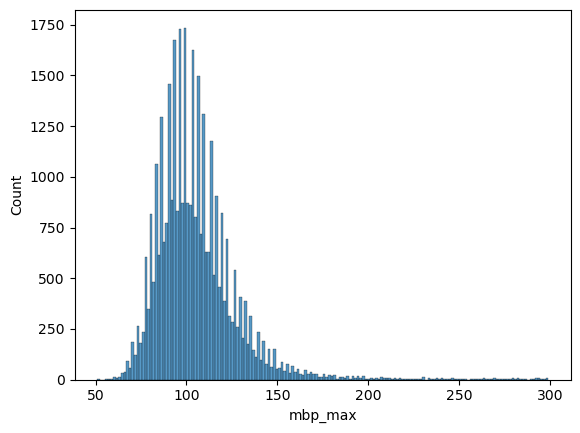

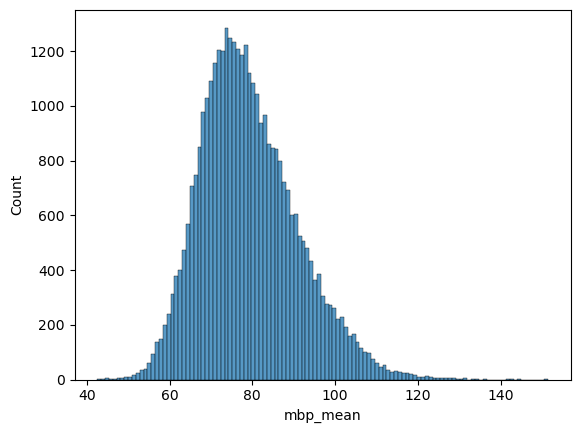

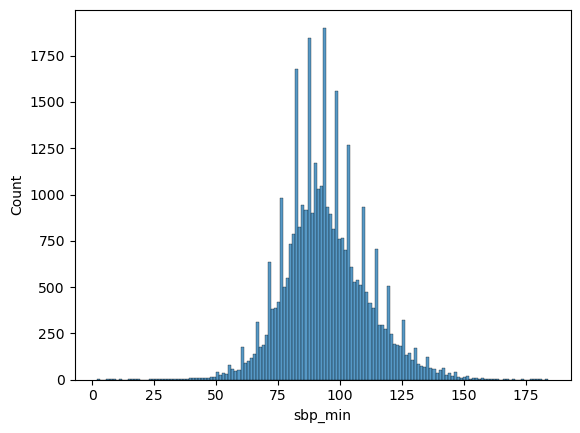

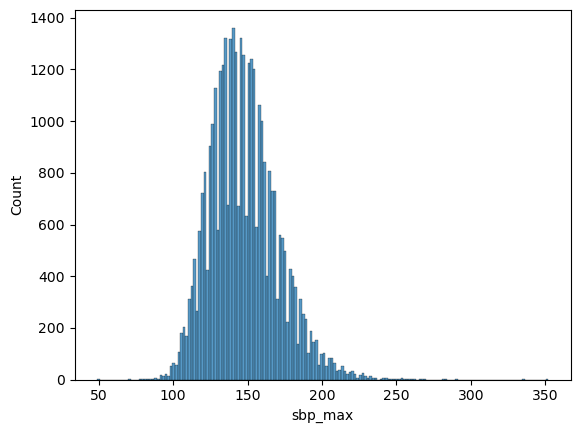

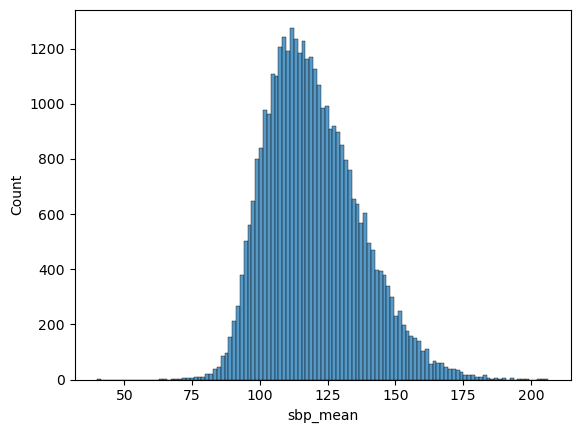

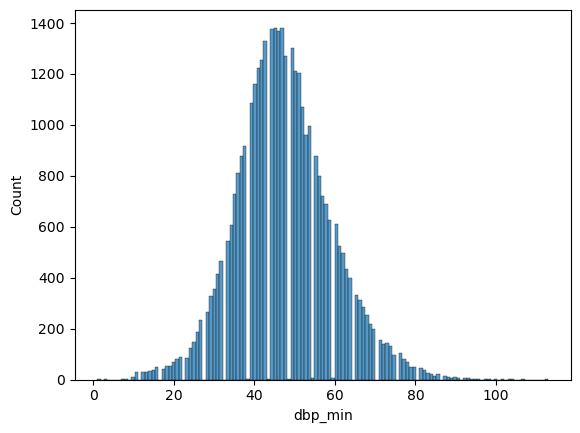

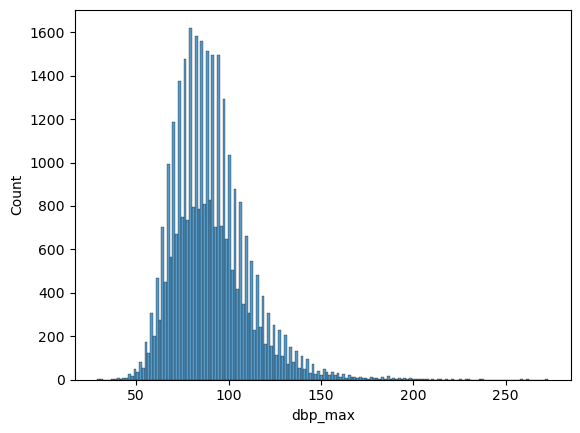

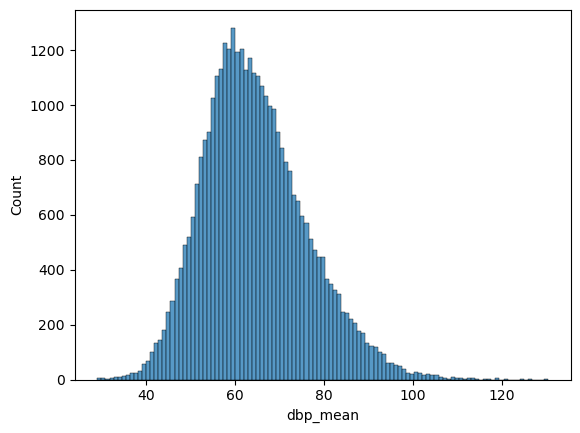

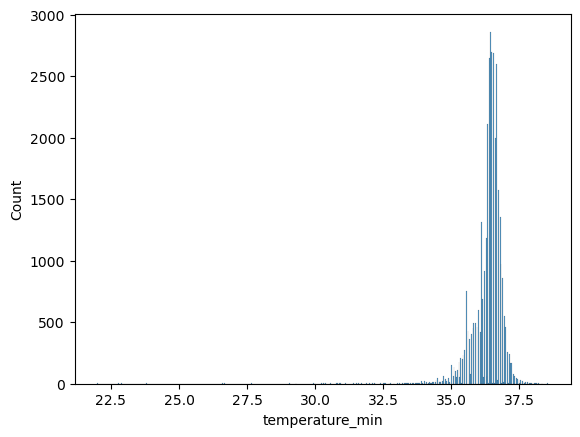

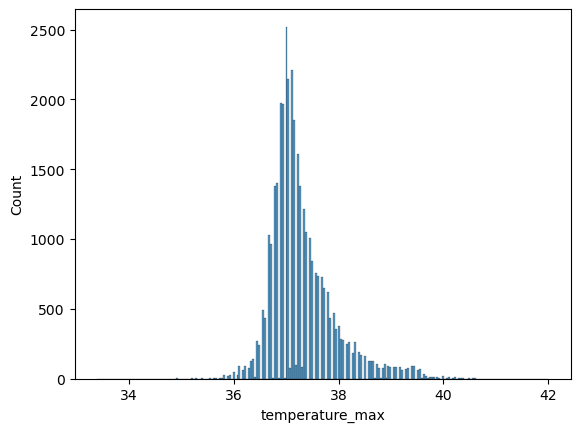

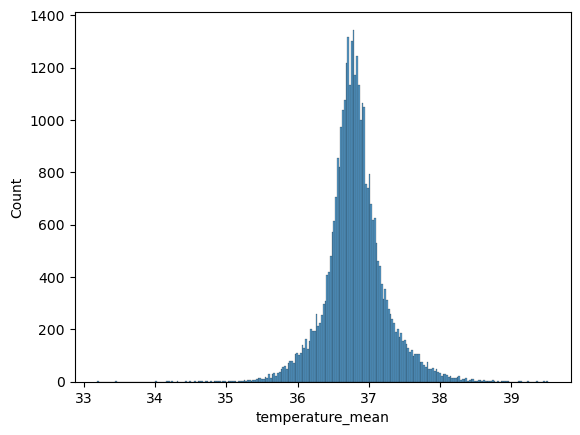

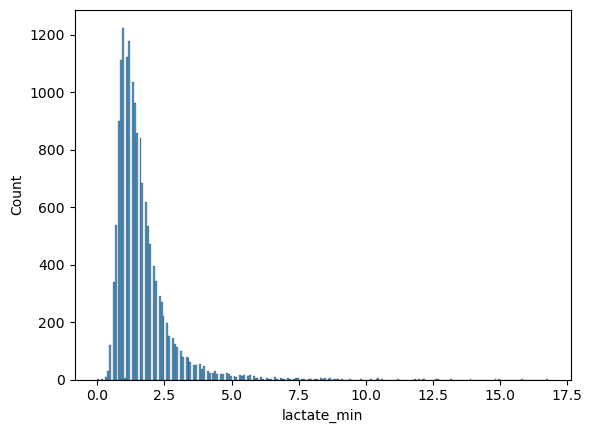

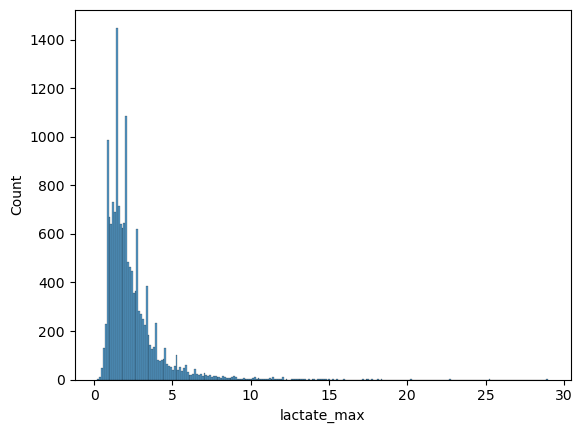

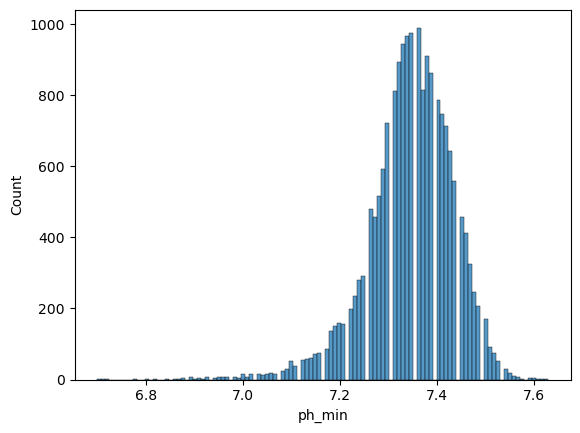

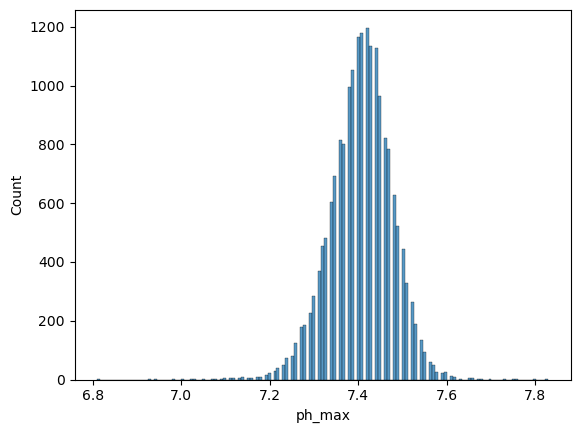

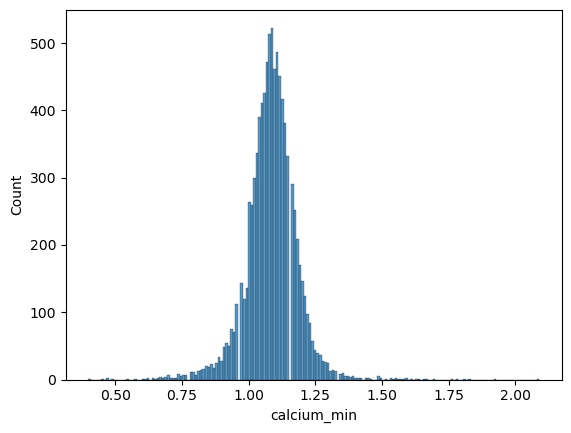

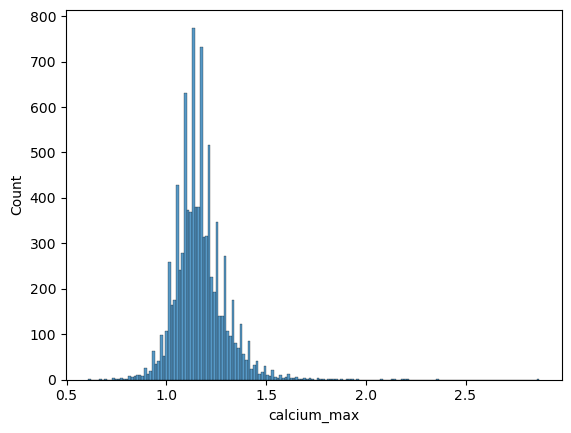

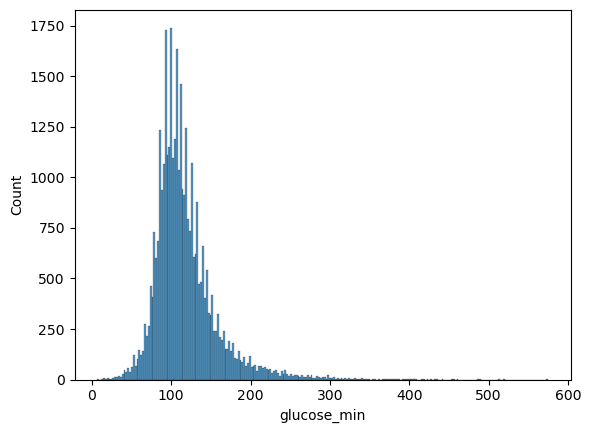

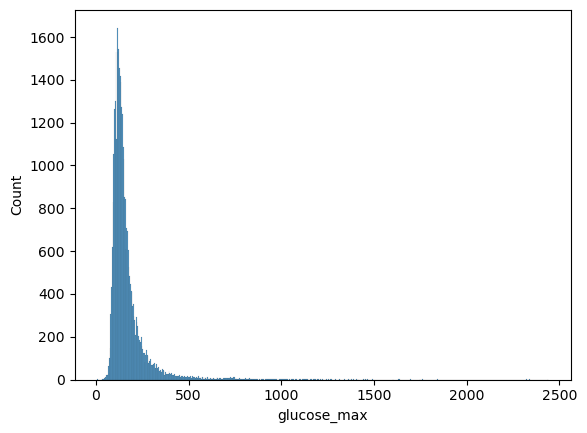

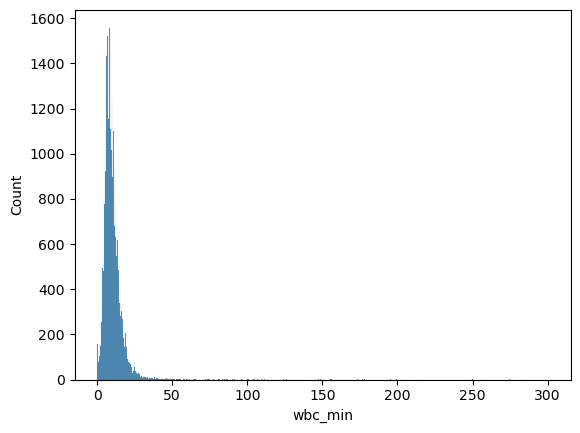

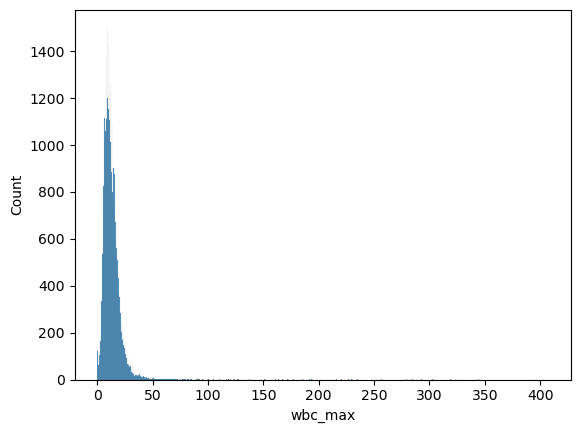

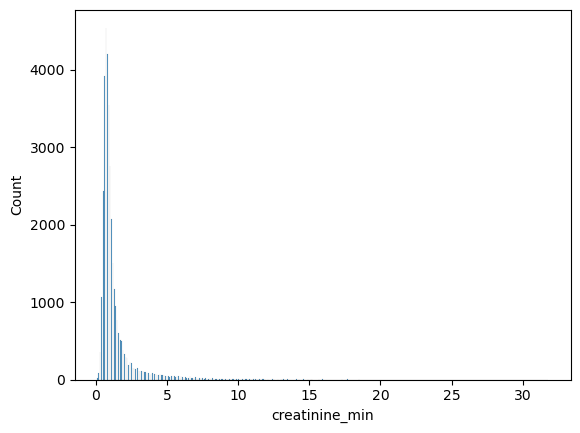

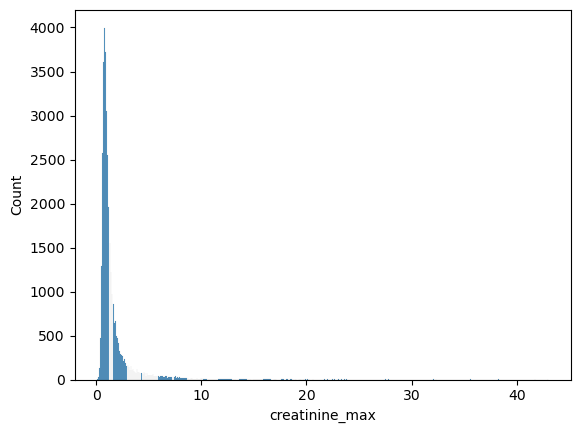

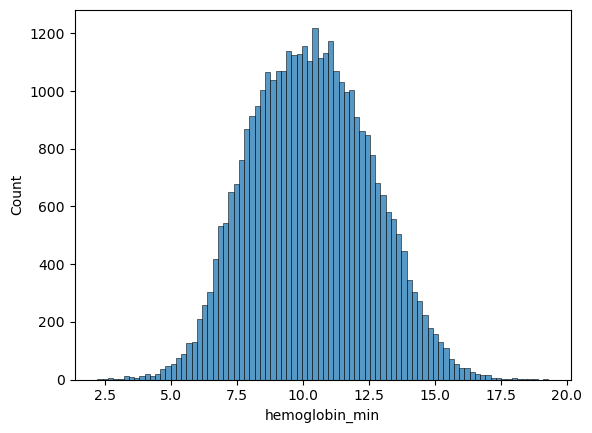

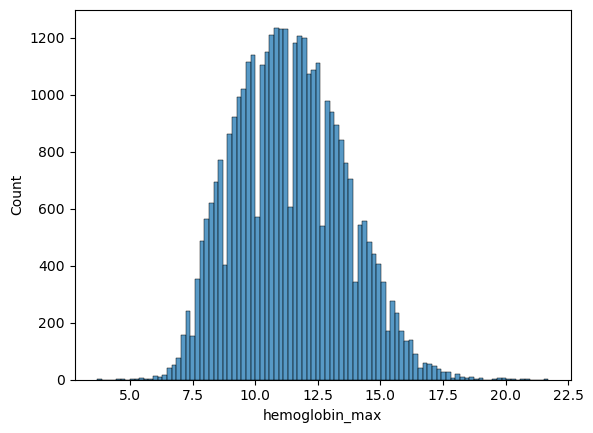

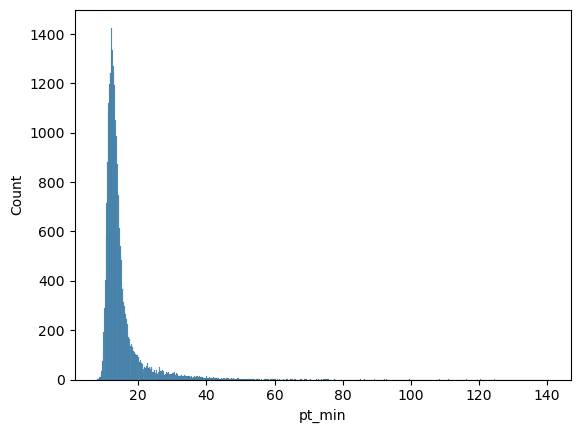

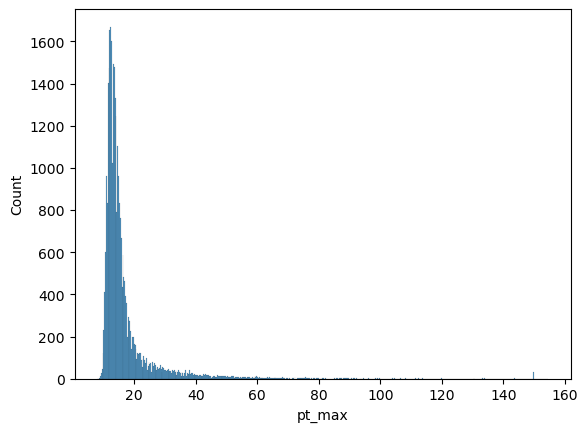

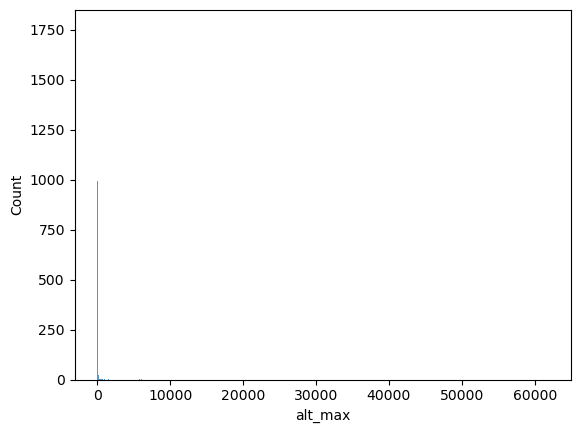

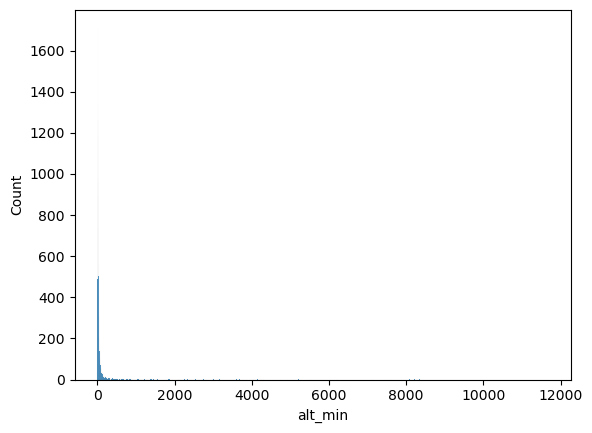

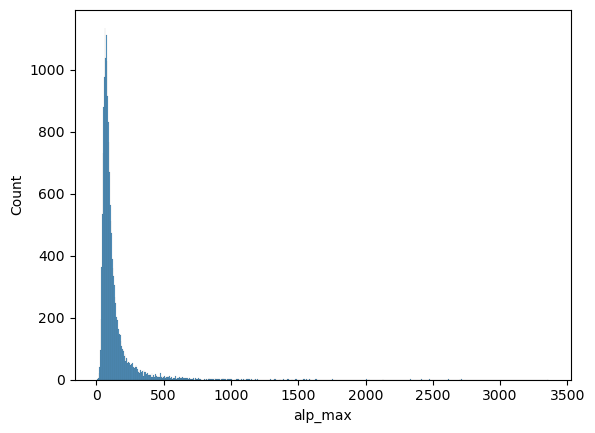

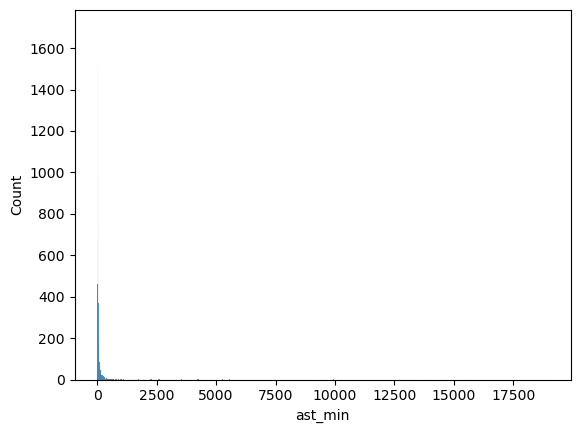

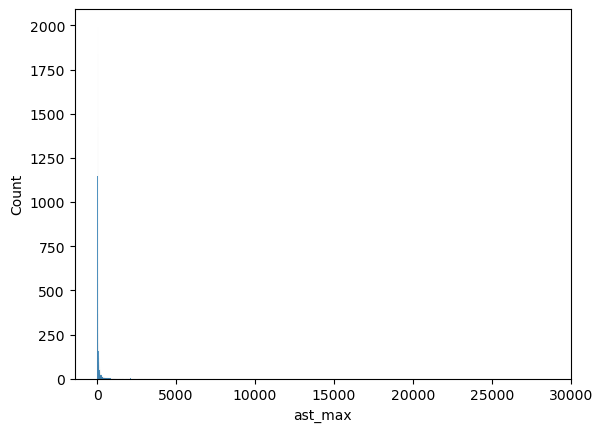

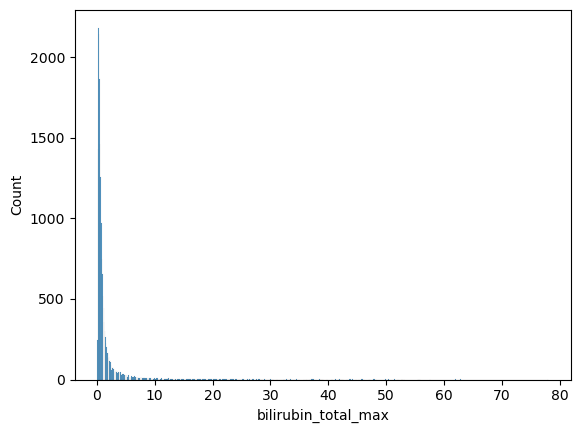

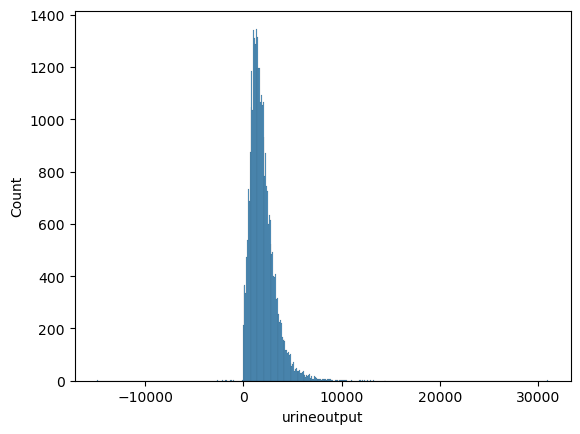

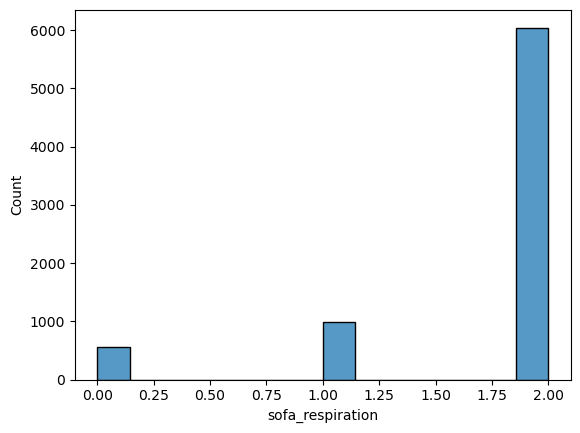

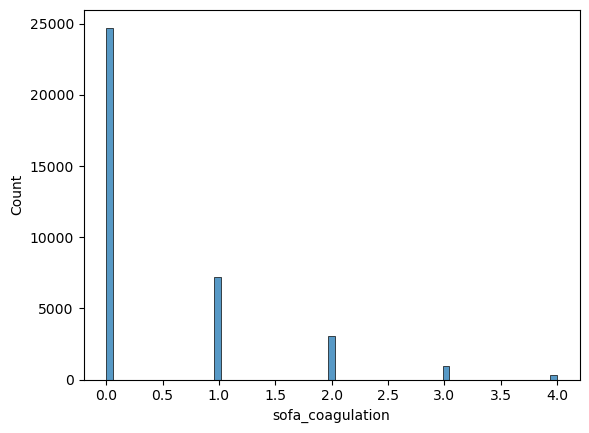

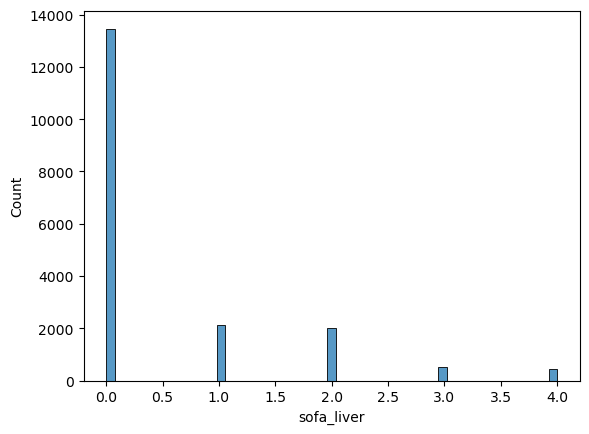

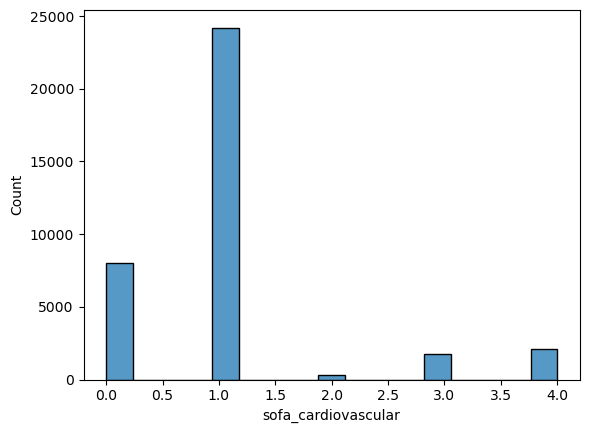

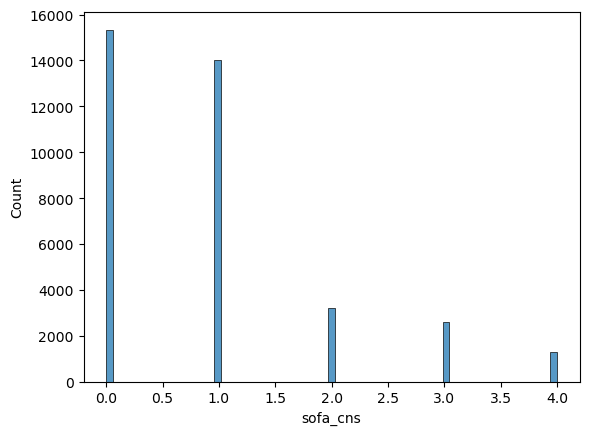

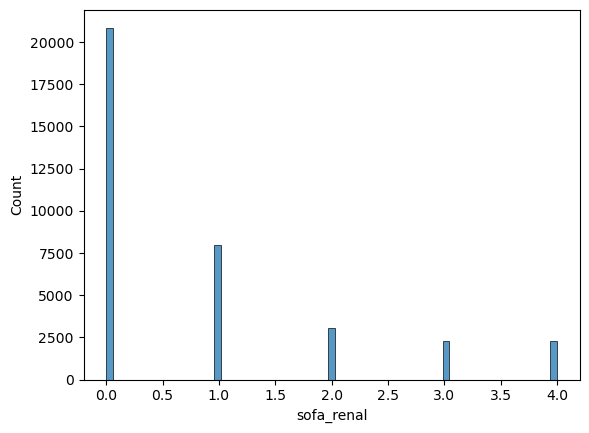

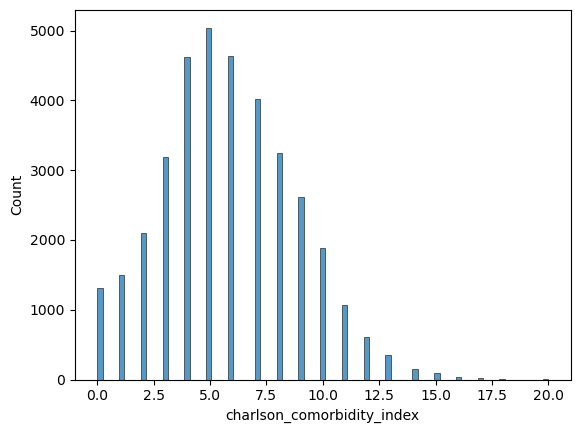

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


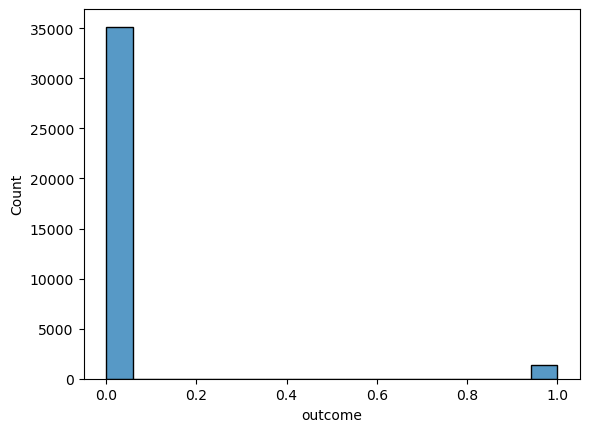

In [13]:
for columns in df.columns:
    plt.show(sns.histplot(data = df, x = columns))

### From the plots it's clear that the data in the dataset are most deviate from the normal distribution, which means that the mean value cannot represent the population very well, on the other hand, the median value can better represent the population.(This will be proved in the following parts)

# <span id='index2'>II. Predictive Models</span>

# <span id='index4'>Logistic Regression</span>

In [14]:
# Copy a dataframe for logistic regression model from original dataframe
df_log = df.copy()

## A. Missing value filled by mean value

### 1. Feature Encoding

In [15]:
df_log['outcome'] = df_log['outcome'].replace({True: 1, False: 0})
df_log['gender'] = df_log['gender'].replace({'M': 1, 'F': 0})

### 2.1 Fill in missing values with `mean` value and apply `SMOTE` oversampling

In [16]:
imp = SimpleImputer(strategy = 'mean')

x_train, x_test, y_train, y_test = train_test_split(imp.fit_transform(df_log.iloc[:,:47]), df_log.iloc[:,-1], test_size = 0.3)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

pipe = make_pipeline(StandardScaler(), LogisticRegression())

### 3.1 Train the model

The accuracy of Logistic Regression model before feature selection is 0.77


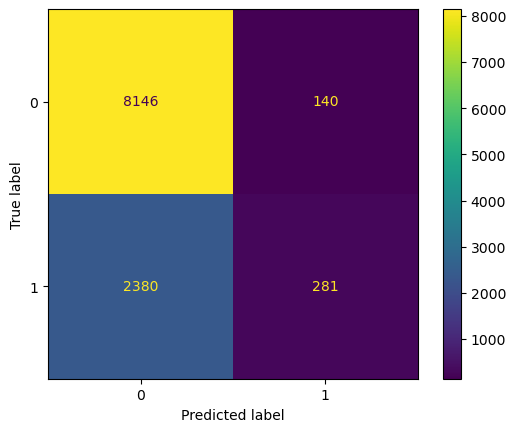

In [17]:
pipe.fit(x_train, y_train) 
log_mean_before = pipe.score(x_test, y_test)
cm = confusion_matrix(pipe.predict(x_test), y_test)

print('The accuracy of Logistic Regression model before feature selection is %.2f' % log_mean_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Record the prediction of `20` times

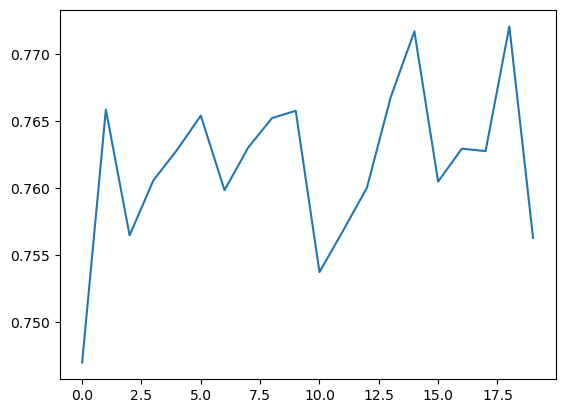

In [18]:
def log_mean_model(df_log):
    x_train, x_test, y_train, y_test = train_test_split(df_log.iloc[:,:47], df_log.iloc[:,-1], test_size = 0.3)
    
    imp = SimpleImputer(strategy = 'mean')
    
    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)
    
    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(x_train, y_train)
    
    return pipe.score(x_test, y_test)

log_mean_before_l = []

for i in range(20):
    log_mean_before_l.append(log_mean_model(df_log))

plt.show(sns.lineplot(x = [i for i in range(20)], y = log_mean_before_l))

### 4.1 Genetic Algorithm for feature selection

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_log.iloc[:,:47], df_log.iloc[:,-1], test_size = 0.3)
    
imp = SimpleImputer(strategy = 'mean')
    
x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)
    
sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)
    
pipe = make_pipeline(StandardScaler(), LogisticRegression())

model = GAFeatureSelectionCV(estimator = pipe, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)
model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.674485	0.0588485  	0.739161   	0.590976   
1  	60    	0.700188	0.0525821  	0.739161   	0.613425   
2  	60    	0.735181	0.00191779 	0.739161   	0.730425   
3  	60    	0.736502	0.00123925 	0.739161   	0.732924   
4  	60    	0.737282	0.00104174 	0.73908    	0.735565   
5  	60    	0.738196	0.00103959 	0.739791   	0.735972   
6  	60    	0.739119	0.000505237	0.739791   	0.738085   
7  	60    	0.73948 	0.000527162	0.741031   	0.738105   
8  	60    	0.739558	0.000479929	0.740685   	0.738105   
9  	60    	0.739698	0.000443204	0.740746   	0.738532   
10 	60    	0.739851	0.000611099	0.742026   	0.738593   
11 	60    	0.740089	0.00082379 	0.742026   	0.738288   
12 	60    	0.741121	0.000790988	0.74229    	0.739344   
13 	60    	0.741356	0.000713529	0.742026   	0.739771   
14 	60    	0.741758	0.000544254	0.74227    	0.739893   
15 	60    	0.741786	0.000414931	0.742107   	0.740705   
16 	60    	0.741955	0.00032996 	0.74229    	0.74

In [20]:
feature_list = []
for i, j in zip(features, df_log.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['mbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max', 'lactate_min', 'lactate_max', 'calcium_min', 'calcium_max', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'creatinine_max', 'pt_min', 'pt_max', 'alt_max', 'alt_min', 'alp_max', 'ast_min', 'ast_max', 'urineoutput', 'sofa_respiration', 'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns']
Number of features after feature selection:  31


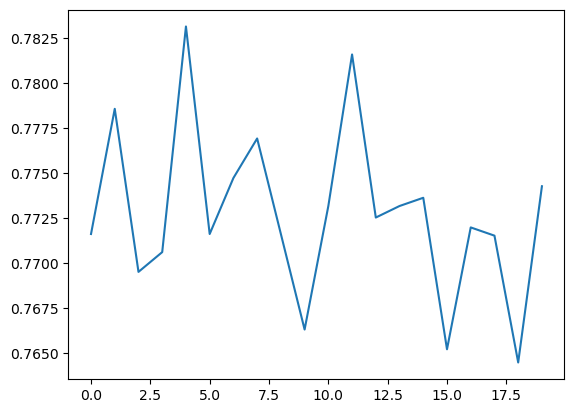

In [21]:
# Train the model for another 20 times with the best features
def log_mean_model(df_log):
    x_train, x_test, y_train, y_test = train_test_split(df_log[feature_list], df_log.iloc[:,-1], test_size = 0.3)
    
    imp = SimpleImputer(strategy = 'mean')
    
    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)
    
    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(x_train, y_train)
    
    return pipe.score(x_test, y_test)

log_mean_after_l = []

for i in range(20):
    log_mean_after_l.append(log_mean_model(df_log))

plt.show(sns.lineplot(x = [i for i in range(20)], y = log_mean_after_l))

### 5.1 Compare the performance before&after feature selection

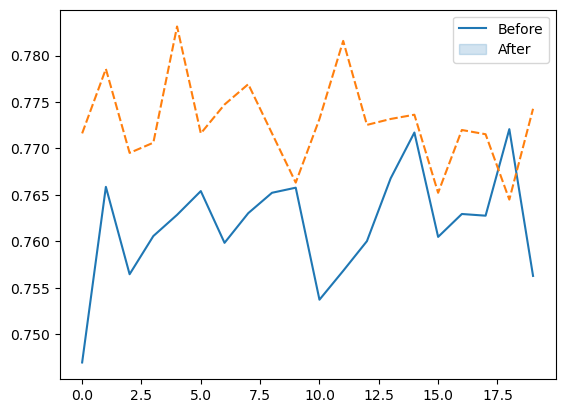

In [22]:
sns.lineplot(data = pd.DataFrame([log_mean_before_l, log_mean_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

## B. Missing value filled by median value

### 2.2 Fill in missing values with `median` value and apply `SMOTE` oversampling

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_log.iloc[:,:47], df_log.iloc[:,-1], test_size = 0.3)
    
imp = SimpleImputer(strategy = 'median')
    
x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)
    
pipe = make_pipeline(StandardScaler(), LogisticRegression())

### 3.2 Train the model

The accuracy of Logistic Regression model before feature selection is 0.76


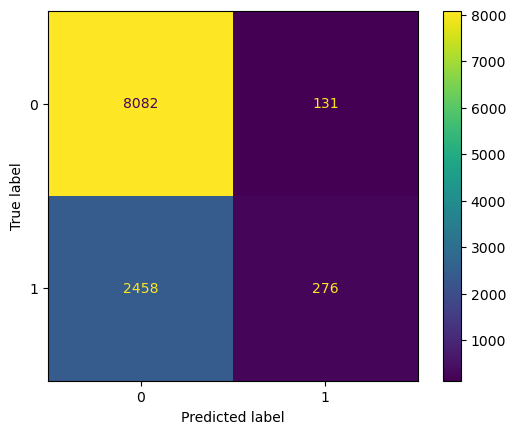

In [24]:
pipe.fit(x_train, y_train) 
log_median_before = pipe.score(x_test, y_test)
cm = confusion_matrix(pipe.predict(x_test), y_test)

print('The accuracy of Logistic Regression model before feature selection is %.2f' % log_median_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

**Record the prediction of `20` times**

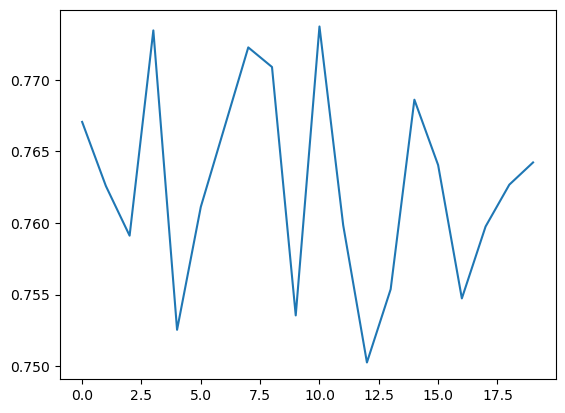

In [25]:
def log_median_model(df_log):
    x_train, x_test, y_train, y_test = train_test_split(df_log.iloc[:,:47], df_log.iloc[:,-1], test_size = 0.3)
    
    imp = SimpleImputer(strategy = 'median')
    
    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)
    
    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(x_train, y_train)
    
    return pipe.score(x_test, y_test)

log_median_before_l = []

for i in range(20):
    log_median_before_l.append(log_median_model(df_log))

plt.show(sns.lineplot(x = [i for i in range(20)], y = log_median_before_l))

### 4.2 Genetic Algorithm for feature selection

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_log.iloc[:,:47], df_log.iloc[:,-1], test_size = 0.3)
    
imp = SimpleImputer(strategy = 'median')
    
x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)
    
sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)
    
pipe = make_pipeline(StandardScaler(), LogisticRegression())

model = GAFeatureSelectionCV(estimator = pipe, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)
model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.653896	0.0646407  	0.730194   	0.581173   
1  	60    	0.715203	0.0379442  	0.732002   	0.584708   
2  	60    	0.729345	0.00177861 	0.732835   	0.726213   
3  	60    	0.730904	0.00152329 	0.733119   	0.727411   
4  	60    	0.73166 	0.00117482 	0.732835   	0.72926    
5  	60    	0.732579	0.000572611	0.73314    	0.730093   
6  	60    	0.732856	0.000205258	0.73314    	0.732083   
7  	60    	0.73298 	0.000410579	0.733749   	0.73119    
8  	60    	0.732921	0.00045355 	0.733749   	0.731616   
9  	60    	0.733119	0.000455211	0.734034   	0.731758   
10 	60    	0.733396	0.000431029	0.734237   	0.732571   
11 	60    	0.733458	0.000458872	0.734237   	0.732307   
12 	60    	0.733631	0.000470436	0.734399   	0.73249    
13 	60    	0.733996	0.000344637	0.734887   	0.733546   
14 	60    	0.734047	0.000496835	0.734887   	0.73253    
15 	60    	0.734267	0.000417515	0.734887   	0.732855   
16 	60    	0.734264	0.000597145	0.735029   	0.73

In [27]:
feature_list = []
for i, j in zip(features, df_log.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['mbp_min', 'sbp_max', 'sbp_mean', 'dbp_max', 'dbp_mean', 'temperature_max', 'temperature_mean', 'lactate_max', 'calcium_max', 'glucose_min', 'glucose_max', 'hemoglobin_max', 'pt_min', 'pt_max', 'alt_max', 'alp_max', 'ast_min', 'ast_max', 'urineoutput', 'sofa_respiration', 'sofa_cns', 'sofa_renal', 'charlson_comorbidity_index']
Number of features after feature selection:  23


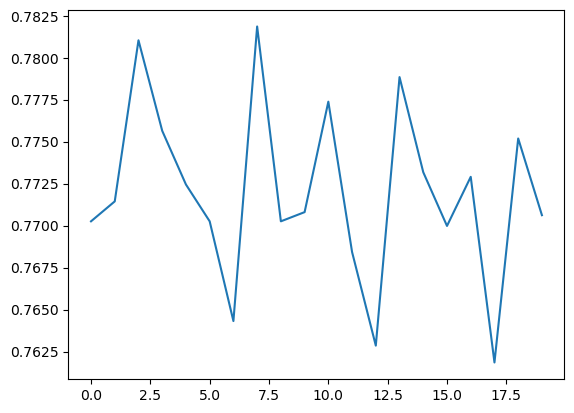

In [28]:
# Train the model for another 20 times with the best features
def log_median_model(df_log):
    x_train, x_test, y_train, y_test = train_test_split(df_log[feature_list], df_log.iloc[:,-1], test_size = 0.3)
    
    imp = SimpleImputer(strategy = 'median')
    
    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)
    
    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(x_train, y_train)
    
    return pipe.score(x_test, y_test)

log_median_after_l = []

for i in range(20):
    log_median_after_l.append(log_median_model(df_log))

plt.show(sns.lineplot(x = [i for i in range(20)], y = log_median_after_l))

### 5.2 Compare the performance before&after feature selection

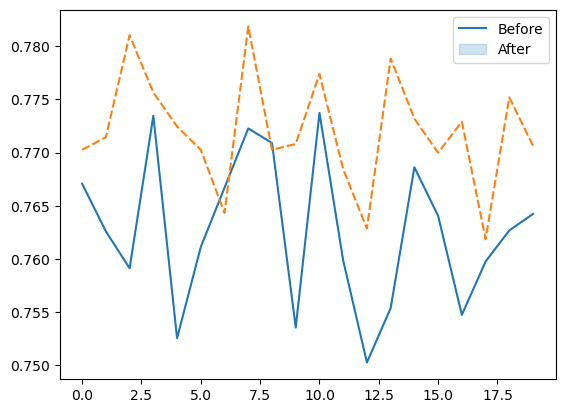

In [29]:
sns.lineplot(data = pd.DataFrame([log_median_before_l, log_median_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

# <span id='index5'>Decision Tree</span>

In [30]:
df_tree = df.copy()

## A. Missing values filled by mean value

### 1. Feature encoding

In [31]:
df_tree['outcome'] = df_tree['outcome'].replace({True: 1, False: 0})
df_tree['gender'] = df_tree['gender'].replace({'M': 1, 'F': 0})

### 2.1 Fill in missing values with `mean` value and apply `SMOTE` oversampling

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'mean')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = tree.DecisionTreeClassifier(criterion="entropy")

### 3.1 Train the model

The accuracy of Decision Tree model before feature selection is 0.26


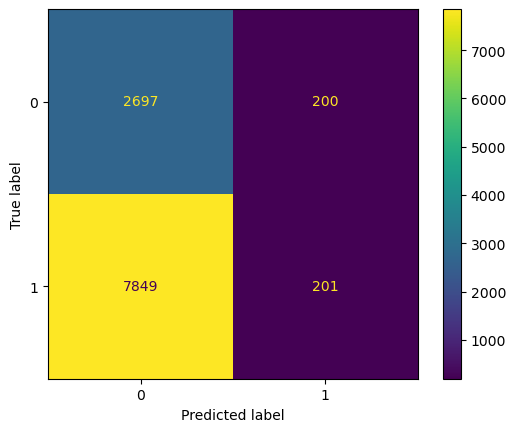

In [33]:
model = model.fit(x_train, y_train)
tree_mean_before = model.score(x_test, y_test)
cm = confusion_matrix(model.predict(x_test), y_test)

print('The accuracy of Decision Tree model before feature selection is %.2f' % tree_mean_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Record the prediction of `20` times

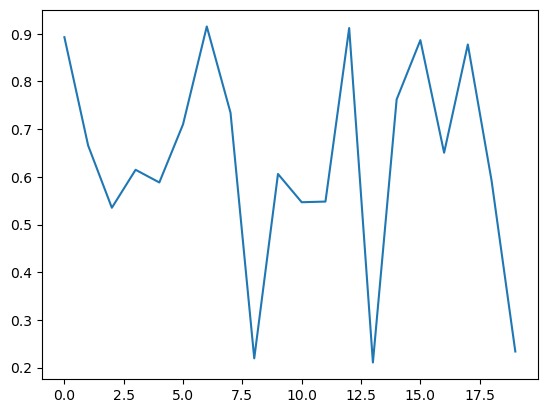

In [34]:
def DT_mean_model(df_tree):
    x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'mean')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = tree.DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

tree_mean_before_l = []

for i in range(20):
    tree_mean_before_l.append(DT_mean_model(df_tree))

plt.show(sns.lineplot(x = [i for i in range(20)], y = tree_mean_before_l))

### 4.1 Genetic Algorithm for feature selection

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'mean')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

estimator = tree.DecisionTreeClassifier(criterion="entropy")
model = GAFeatureSelectionCV(estimator = estimator, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)

model = model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.945609	0.00738692 	0.954523   	0.929265   
1  	60    	0.950958	0.00467641 	0.955377   	0.93526    
2  	60    	0.954077	0.00145834 	0.955641   	0.947818   
3  	60    	0.95502 	0.000626239	0.955641   	0.953548   
4  	60    	0.955333	0.000478514	0.956149   	0.953812   
5  	60    	0.955608	0.000490966	0.956962   	0.954158   
6  	60    	0.955922	0.000436108	0.956962   	0.955295   
7  	60    	0.956361	0.000579838	0.957571   	0.955214   
8  	60    	0.956767	0.000724659	0.95814    	0.95434    
9  	60    	0.957022	0.000784679	0.958628   	0.955499   
10 	60    	0.957281	0.000690373	0.958628   	0.955702   
11 	60    	0.957567	0.000369635	0.958201   	0.956698   
12 	60    	0.957786	0.000314349	0.958445   	0.957206   
13 	60    	0.957821	0.000314184	0.958567   	0.956677   
14 	60    	0.957926	0.000478533	0.958567   	0.956616   
15 	60    	0.957913	0.000436086	0.958567   	0.956799   
16 	60    	0.957979	0.000396668	0.958567   	0.95

In [36]:
feature_list = []
for i, j in zip(features, df_tree.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['gender', 'age', 'heart_rate_min', 'heart_rate_mean', 'sbp_max', 'dbp_min', 'creatinine_min', 'creatinine_max', 'pt_min', 'alt_min', 'alp_max', 'ast_min', 'ast_max', 'bilirubin_total_max', 'urineoutput', 'sofa_respiration', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal', 'charlson_comorbidity_index']
Number of features after feature selection:  20


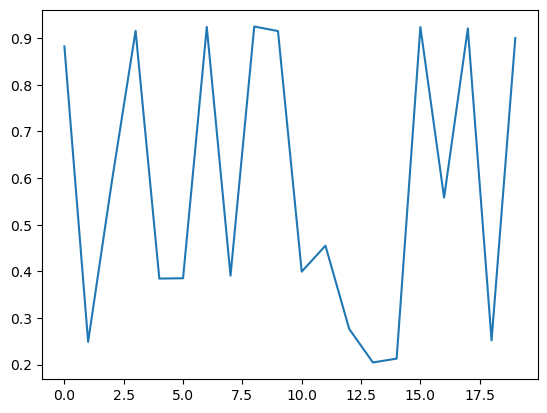

In [37]:
def DT_mean_model(df_tree):
    x_train, x_test, y_train, y_test = train_test_split(df_tree[feature_list], df_tree.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'mean')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = tree.DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

tree_mean_after_l = []

for i in range(20):
    tree_mean_after_l.append(DT_mean_model(df_tree))

plt.show(sns.lineplot(x = [i for i in range(20)], y = tree_mean_after_l))

### 5.1 Compare the performance before&after feature selection

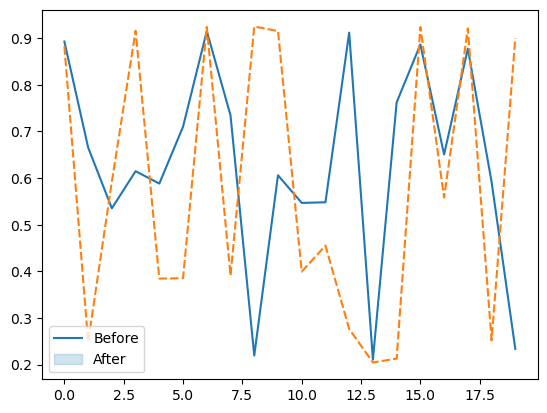

In [38]:
sns.lineplot(data = pd.DataFrame([tree_mean_before_l, tree_mean_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

### From this part we can clearly see that use mean value to fill in the missing value can easily cause the overfitting in predictive model since the mean value can not represent the population in a dataset that deviate from the normal distribution

## B. Missing values filled by median value

### 2.2 Fill in missing values with `median` value and apply `SMOTE` oversampling

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'median')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = tree.DecisionTreeClassifier(criterion="entropy")

### 3.2 Train the model

The accuracy of Decision Tree model before feature selection is 0.92


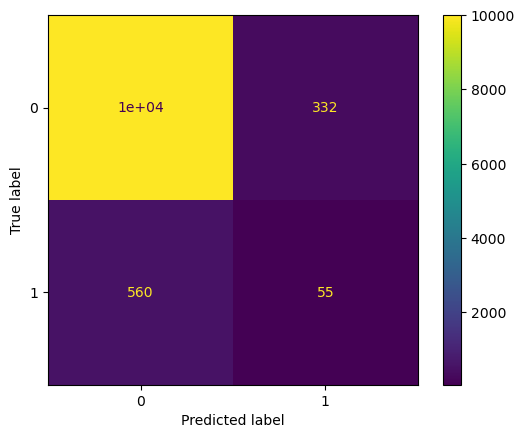

In [40]:
model.fit(x_train, y_train) 
tree_median_before = model.score(x_test, y_test)
cm = confusion_matrix(model.predict(x_test), y_test)

print('The accuracy of Decision Tree model before feature selection is %.2f' % tree_median_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Record the prediction of `20` times

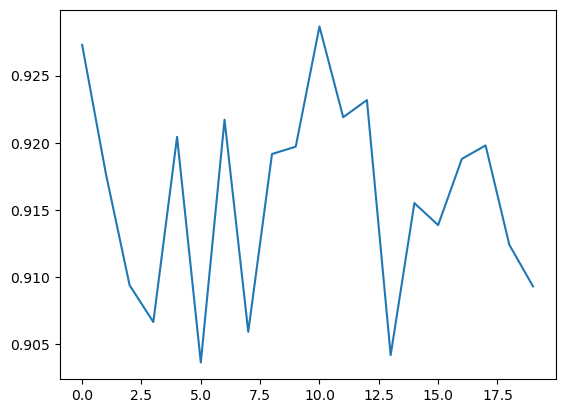

In [41]:
def DT_median_model(df_tree):
    x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'median')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = tree.DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

tree_median_before_l = []

for i in range(20):
    tree_median_before_l.append(DT_median_model(df_tree))

plt.show(sns.lineplot(x = [i for i in range(20)], y = tree_median_before_l))

### 4.2 Genetic Algorithm for feature selection

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_tree.iloc[:,:47], df_tree.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'median')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

estimator = tree.DecisionTreeClassifier(criterion="entropy")
model = GAFeatureSelectionCV(estimator = estimator, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)

model = model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.94443	0.00608046 	0.954599   	0.931309   
1  	60    	0.95047	0.00313696 	0.954599   	0.94032    
2  	60    	0.952643	0.00120465 	0.954884   	0.949779   
3  	60    	0.953539	0.000892699	0.955027   	0.951833   
4  	60    	0.954109	0.00100666 	0.955027   	0.949718   
5  	60    	0.954579	0.000547803	0.955149   	0.952158   
6  	60    	0.954911	0.000220465	0.955271   	0.954091   
7  	60    	0.954975	0.000226979	0.955454   	0.954355   
8  	60    	0.954998	0.000512462	0.956003   	0.953501   
9  	60    	0.955294	0.000500479	0.956003   	0.954091   
10 	60    	0.955228	0.000577607	0.956369   	0.953704   
11 	60    	0.955517	0.000468987	0.956369   	0.954762   
12 	60    	0.95543 	0.000579247	0.956593   	0.953664   
13 	60    	0.955642	0.000421173	0.95645    	0.954803   
14 	60    	0.955628	0.000392739	0.956389   	0.954864   
15 	60    	0.955657	0.00038784 	0.956389   	0.954864   
16 	60    	0.955539	0.000443678	0.956389   	0.95466

In [43]:
feature_list = []
for i, j in zip(features, df_tree.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_mean', 'lactate_min', 'calcium_min', 'calcium_max', 'wbc_min', 'creatinine_min', 'hemoglobin_max', 'pt_min', 'pt_max', 'alt_max', 'bilirubin_total_max', 'urineoutput', 'sofa_respiration', 'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal']
Number of features after feature selection:  26


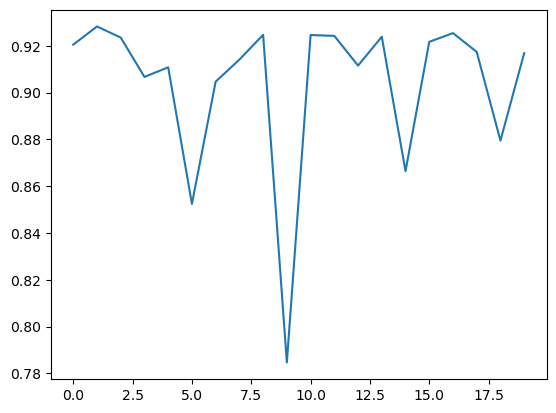

In [44]:
def DT_median_model(df_tree):
    x_train, x_test, y_train, y_test = train_test_split(df_tree[feature_list], df_tree.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'median')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = tree.DecisionTreeClassifier(criterion="entropy")
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

tree_median_after_l = []

for i in range(20):
    tree_median_after_l.append(DT_median_model(df_tree))

plt.show(sns.lineplot(x = [i for i in range(20)], y = tree_median_after_l))

### 5.2 Compare the performance before&after feature selection

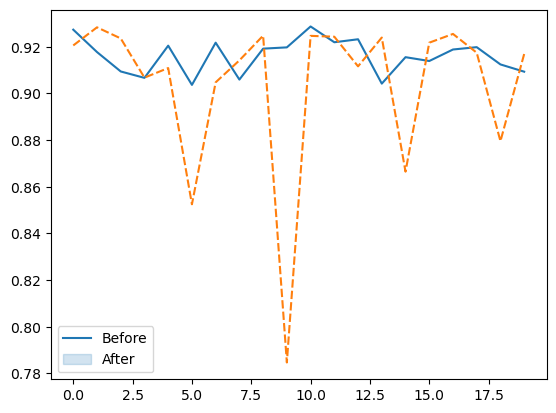

In [45]:
sns.lineplot(data = pd.DataFrame([tree_median_before_l, tree_median_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

### From this part we can see that fill in the missing values with median value can acheive a better performance in the predictive model, which proves our previous speculation.

# <span id='index6'>Random Forest</span>

In [46]:
df_RF = df.copy()

## A. Missing values filled by mean value

In [47]:
df_RF['outcome'] = df_RF['outcome'].replace({True: 1, False: 0})
df_RF['gender'] = df_RF['gender'].replace({'M': 1, 'F': 0})

### 2.1 Fill in missing values with `mean` value and apply `SMOTE` oversampling

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'mean')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = RandomForestClassifier()

### 3.1 Train the model

The accuracy of Decision Tree model before feature selection is 0.91


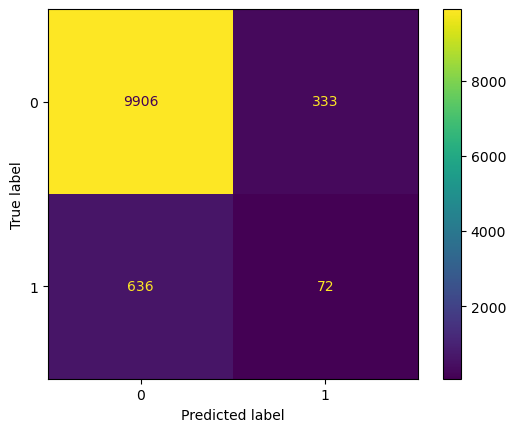

In [49]:
model = model.fit(x_train, y_train)
RF_mean_before = model.score(x_test, y_test)
cm = confusion_matrix(model.predict(x_test), y_test)

print('The accuracy of Decision Tree model before feature selection is %.2f' % RF_mean_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Record the prediction of `20` times

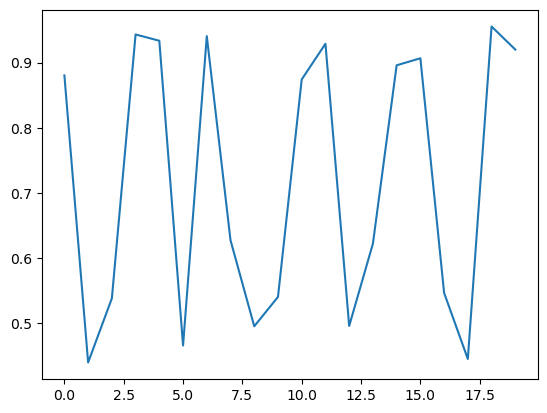

In [50]:
def RF_mean_model(df_RF):
    x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'mean')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = RandomForestClassifier()
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

RF_mean_before_l = []

for i in range(20):
    RF_mean_before_l.append(RF_mean_model(df_RF))

plt.show(sns.lineplot(x = [i for i in range(20)], y = RF_mean_before_l))

### 4.1 Genetic Algorithm for feature selection

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'mean')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = RandomForestClassifier()

model = GAFeatureSelectionCV(estimator = estimator, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)

model = model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.945379	0.00807045 	0.956162   	0.931178   
1  	60    	0.952581	0.0040049  	0.957379   	0.942178   
2  	60    	0.95556 	0.00244222 	0.957826   	0.945527   
3  	60    	0.956428	0.00144294 	0.95811    	0.95194    
4  	60    	0.957202	0.00055371 	0.958557   	0.95604    
5  	60    	0.957513	0.000440794	0.958617   	0.95675    
6  	60    	0.957724	0.00037739 	0.958617   	0.956872   
7  	60    	0.957687	0.000411656	0.958232   	0.956588   
8  	60    	0.957829	0.000432941	0.959125   	0.956933   
9  	60    	0.958069	0.000425931	0.959084   	0.956791   
10 	60    	0.958009	0.000620658	0.959084   	0.955472   
11 	60    	0.958193	0.00036749 	0.959084   	0.957501   
12 	60    	0.958389	0.000371059	0.959084   	0.957522   
13 	60    	0.958413	0.00046001 	0.95945    	0.95744    
14 	60    	0.958566	0.000416519	0.95945    	0.957501   
15 	60    	0.958596	0.000364978	0.959084   	0.957684   
16 	60    	0.958742	0.000300928	0.959206   	0.95

In [52]:
feature_list = []
for i, j in zip(features, df_RF.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['gender', 'heart_rate_min', 'heart_rate_mean', 'sbp_max', 'sbp_mean', 'temperature_mean', 'lactate_min', 'ph_min', 'calcium_min', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'pt_max', 'ast_max', 'urineoutput', 'sofa_respiration', 'sofa_coagulation', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal']
Number of features after feature selection:  21


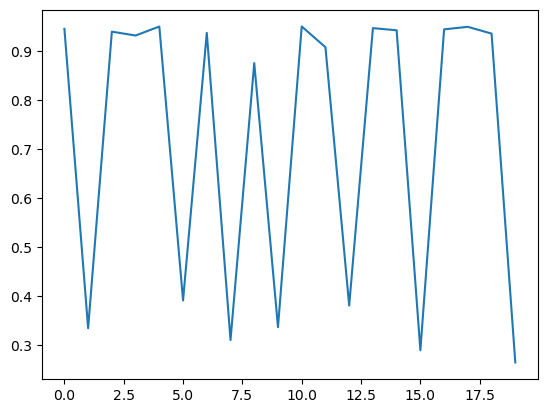

In [53]:
def RF_mean_model(df_RF):
    x_train, x_test, y_train, y_test = train_test_split(df_RF[feature_list], df_RF.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'mean')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = RandomForestClassifier()
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

RF_mean_after_l = []

for i in range(20):
    RF_mean_after_l.append(RF_mean_model(df_RF))

plt.show(sns.lineplot(x = [i for i in range(20)], y = RF_mean_after_l))

### 5.1 Compare the performance before&after feature selection

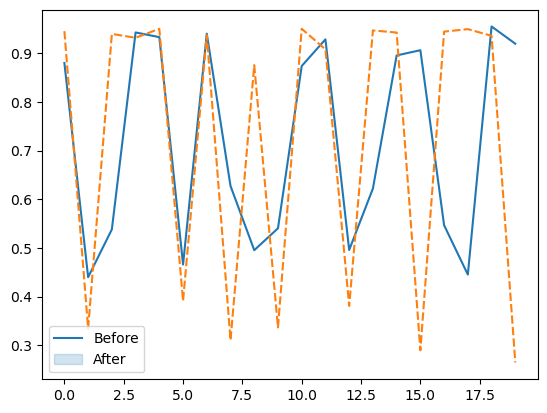

In [54]:
sns.lineplot(data = pd.DataFrame([RF_mean_before_l, RF_mean_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

## B. Missing values filled by median value

### 2.2 Fill in missing values with `median` value and apply `SMOTE` oversampling

In [55]:
x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'median')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = RandomForestClassifier()

### 3.2 Train the model

The accuracy of Random Forest model before feature selection is 0.96


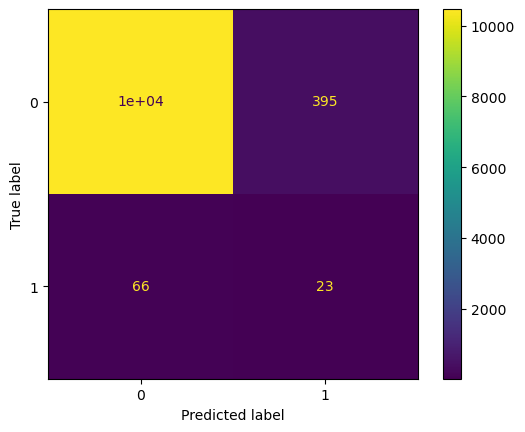

In [56]:
model = model.fit(x_train, y_train)
RF_median_before = model.score(x_test, y_test)
cm = confusion_matrix(model.predict(x_test), y_test)

print('The accuracy of Random Forest model before feature selection is %.2f' % RF_median_before)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Record the prediction of `20` times

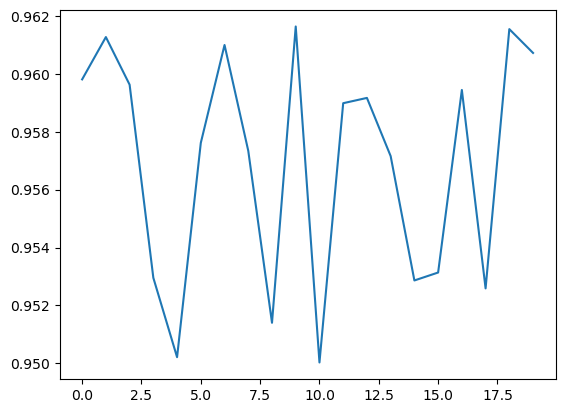

In [57]:
def RF_median_model(df_RF):
    x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'median')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = RandomForestClassifier()
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

RF_median_before_l = []

for i in range(20):
    RF_median_before_l.append(RF_median_model(df_RF))

plt.show(sns.lineplot(x = [i for i in range(20)], y = RF_median_before_l))

### 4.1 Genetic Algorithm for feature selection

In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_RF.iloc[:,:47], df_RF.iloc[:,-1], test_size = 0.3)

imp = SimpleImputer(strategy = 'median')

x_train = imp.fit_transform(x_train)
x_test = imp.fit_transform(x_test)

sm = SMOTE(random_state = 0)
x_train, y_train = sm.fit_resample(x_train, y_train)

model = RandomForestClassifier()

model = GAFeatureSelectionCV(estimator = estimator, cv = 3, scoring = "accuracy", population_size = 30, generations = 40, n_jobs = -1, verbose = True, keep_top_k = 2, elitism = True,)

model = model.fit(x_train, y_train)

features = model.best_features_

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	30    	0.94327	0.00799786 	0.953998   	0.924564   
1  	60    	0.949564	0.00511422 	0.953694   	0.934768   
2  	60    	0.952294	0.00234301 	0.954629   	0.940989   
3  	60    	0.953452	0.000572634	0.954629   	0.952271   
4  	60    	0.953866	0.000468765	0.955015   	0.953307   
5  	60    	0.953918	0.000413038	0.955015   	0.953185   
6  	60    	0.954273	0.000428001	0.95536    	0.953307   
7  	60    	0.954458	0.00039328 	0.95536    	0.953633   
8  	60    	0.954489	0.000320625	0.95536    	0.953998   
9  	60    	0.954446	0.000460352	0.95536    	0.952555   
10 	60    	0.954542	0.000469886	0.955909   	0.95345    
11 	60    	0.954714	0.000649095	0.956153   	0.953328   
12 	60    	0.954879	0.000520832	0.956153   	0.953592   
13 	60    	0.95497 	0.000416574	0.956153   	0.954344   
14 	60    	0.95495 	0.000622558	0.956153   	0.953795   
15 	60    	0.954883	0.000577648	0.956011   	0.953389   
16 	60    	0.954919	0.000642559	0.956397   	0.9533

In [59]:
feature_list = []
for i, j in zip(features, df_RF.columns):
    if i == True:
        feature_list.append(j)
print("The updated feature list is: ", feature_list)
print("Number of features after feature selection: ", len(feature_list))

The updated feature list is:  ['gender', 'heart_rate_mean', 'mbp_max', 'sbp_min', 'dbp_max', 'temperature_min', 'temperature_mean', 'ph_min', 'calcium_max', 'glucose_min', 'glucose_max', 'hemoglobin_max', 'pt_min', 'pt_max', 'alt_max', 'alt_min', 'alp_max', 'ast_min', 'ast_max', 'urineoutput', 'sofa_respiration', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal']
Number of features after feature selection:  25


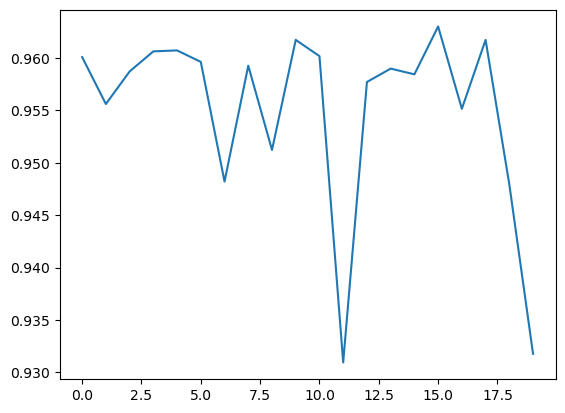

In [60]:
def RF_median_model(df_RF):
    x_train, x_test, y_train, y_test = train_test_split(df_RF[feature_list], df_RF.iloc[:,-1], test_size = 0.3)

    imp = SimpleImputer(strategy = 'median')

    x_train = imp.fit_transform(x_train)
    x_test = imp.fit_transform(x_test)

    sm = SMOTE(random_state = 0)
    x_train, y_train = sm.fit_resample(x_train, y_train)

    model = RandomForestClassifier()
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    return accuracy_score(y_pred, y_test)

RF_median_after_l = []

for i in range(20):
    RF_median_after_l.append(RF_median_model(df_RF))

plt.show(sns.lineplot(x = [i for i in range(20)], y = RF_median_after_l))

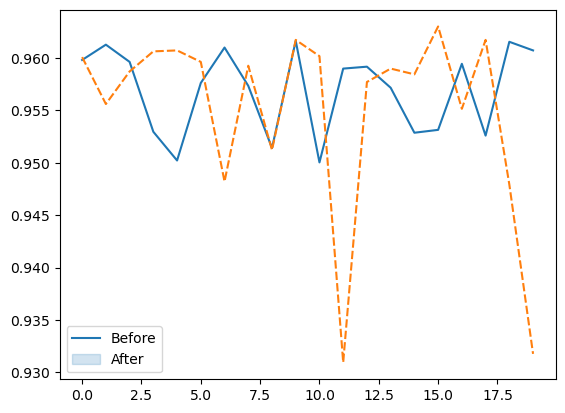

In [61]:
sns.lineplot(data = pd.DataFrame([RF_median_before_l, RF_median_after_l]).T)
plt.legend(labels = ['Before', 'After'])
plt.show()

# <span id='index3'>III.Result Analysis</span>

In [66]:
mean_accuracy_l = [log_mean_before_l, log_mean_after_l, tree_mean_before_l, tree_mean_after_l, RF_mean_before_l, RF_mean_after_l]
median_accuracy_l = [log_median_before_l, log_median_after_l, tree_median_before_l, tree_median_after_l, RF_median_before_l, RF_median_after_l]

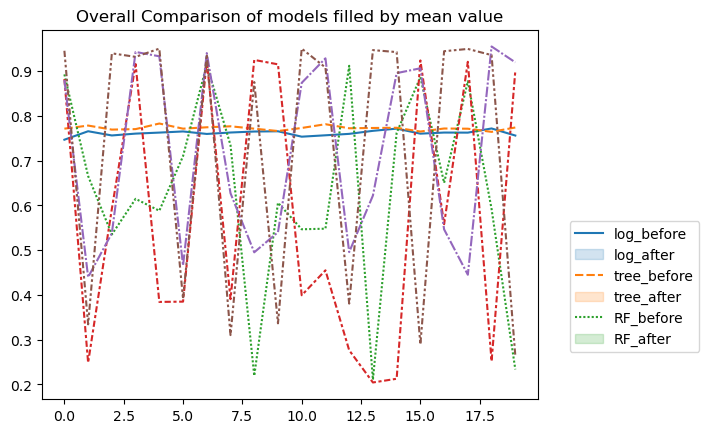

In [72]:
sns.lineplot(data = pd.DataFrame(mean_accuracy_l).T, linestyle = 'solid')
plt.legend(labels = ['log_before', 'log_after', 'tree_before', 'tree_after', 'RF_before', 'RF_after'], bbox_to_anchor=(1.05, 0.5))
plt.title('Overall Comparison of models filled by mean value')
plt.show()

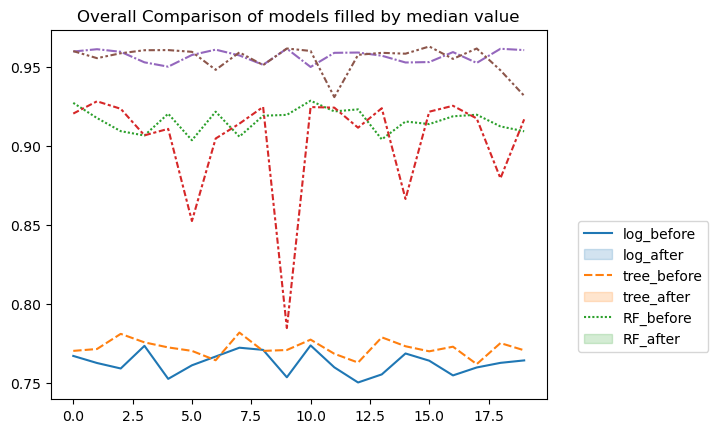

In [73]:
sns.lineplot(data = pd.DataFrame(median_accuracy_l).T, linestyle = 'solid')
plt.legend(labels = ['log_before', 'log_after', 'tree_before', 'tree_after', 'RF_before', 'RF_after'], bbox_to_anchor=(1.05, 0.5))
plt.title('Overall Comparison of models filled by median value')
plt.show()

Here are the mean accuracy of 10 times experiment of the models which fill missing values with mean value:

The mean accuracy of Logistic Regression before feature selection is 0.76
The mean accuracy of Logistic Regression after feature selection is 0.77

The mean accuracy of Decision Tree before feature selection is 0.64
The mean accuracy of Decision Tree after feature selection is 0.58

The mean accuracy of Random Forest before feature selection is 0.72
The mean accuracy of Random Forest after feature selection is 0.72


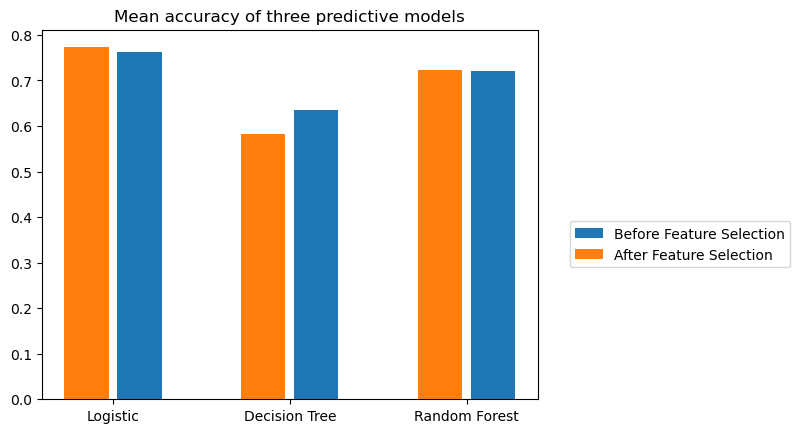

In [152]:
print('Here are the mean accuracy of 10 times experiment of the models which fill missing values with mean value:')
print()
print('The mean accuracy of Logistic Regression before feature selection is %.2f' %np.mean(log_mean_before_l))
print('The mean accuracy of Logistic Regression after feature selection is %.2f' %np.mean(log_mean_after_l))
print()
print('The mean accuracy of Decision Tree before feature selection is %.2f' %np.mean(tree_mean_before_l))
print('The mean accuracy of Decision Tree after feature selection is %.2f' %np.mean(tree_mean_after_l))
print()
print('The mean accuracy of Random Forest before feature selection is %.2f' %np.mean(RF_mean_before_l))
print('The mean accuracy of Random Forest after feature selection is %.2f' %np.mean(RF_mean_after_l))

x = np.arange(3)

plt.bar(x + 0.15, [np.mean(log_mean_before_l), np.mean(tree_mean_before_l), np.mean(RF_mean_before_l)], width=0.25, label='Logistic')
plt.bar(x - 0.15, [np.mean(log_mean_after_l), np.mean(tree_mean_after_l), np.mean(RF_mean_after_l)], width=0.25, label='Random Forest')
plt.xticks(x, ['Logistic', 'Decision Tree', 'Random Forest'])
plt.legend(['Before Feature Selection', 'After Feature Selection'], bbox_to_anchor=(1.05, 0.5))
plt.title('Mean accuracy of three predictive models')
plt.show()


Here are the mean accuracy of 10 times experiment of the models which fill missing values with median value:

The mean accuracy of Logistic Regression before feature selection is 0.76
The mean accuracy of Logistic Regression after feature selection is 0.77

The mean accuracy of Decision Tree before feature selection is 0.92
The mean accuracy of Decision Tree after feature selection is 0.90

The mean accuracy of Random Forest before feature selection is 0.96
The mean accuracy of Random Forest after feature selection is 0.96


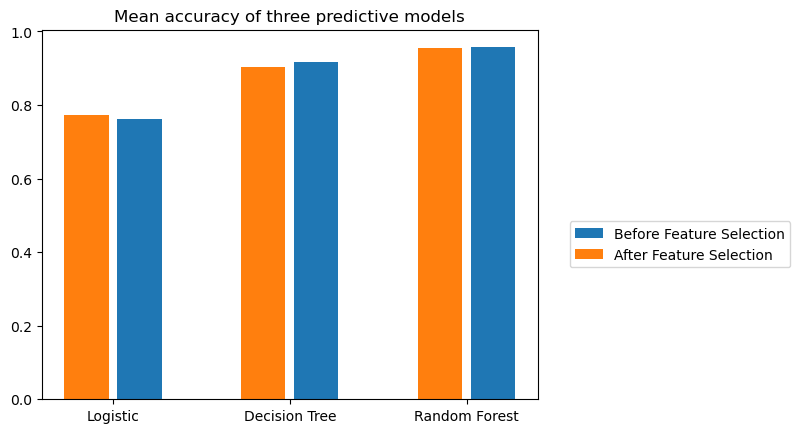

In [153]:
print('Here are the mean accuracy of 20 times experiment of the models which fill missing values with median value:')
print()
print('The mean accuracy of Logistic Regression before feature selection is %.2f' %np.mean(log_median_before_l))
print('The mean accuracy of Logistic Regression after feature selection is %.2f' %np.mean(log_median_after_l))
print()
print('The mean accuracy of Decision Tree before feature selection is %.2f' %np.mean(tree_median_before_l))
print('The mean accuracy of Decision Tree after feature selection is %.2f' %np.mean(tree_median_after_l))
print()
print('The mean accuracy of Random Forest before feature selection is %.2f' %np.mean(RF_median_before_l))
print('The mean accuracy of Random Forest after feature selection is %.2f' %np.mean(RF_median_after_l))

x = np.arange(3)

plt.bar(x + 0.15, [np.mean(log_median_before_l), np.mean(tree_median_before_l), np.mean(RF_median_before_l)], width= 0.25, label='Logistic')
plt.bar(x - 0.15, [np.mean(log_median_after_l), np.mean(tree_median_after_l), np.mean(RF_median_after_l)], width=0.25, label='Random Forest')
plt.xticks(x, ['Logistic', 'Decision Tree', 'Random Forest'])
plt.legend(['Before Feature Selection', 'After Feature Selection'], bbox_to_anchor=(1.05, 0.5))
plt.title('Mean accuracy of three predictive models')
plt.show()

Here are the standard deviations of 10 times experiment of the models which fill missing values with mean value:

The standard deviations of Logistic Regression before feature selection is 0.01
The standard deviations of Logistic Regression after feature selection is 0.00

The standard deviations of Decision Tree before feature selection is 0.21
The standard deviations of Decision Tree after feature selection is 0.29

The standard deviations of Random Forest before feature selection is 0.20
The standard deviations of Random Forest after feature selection is 0.29


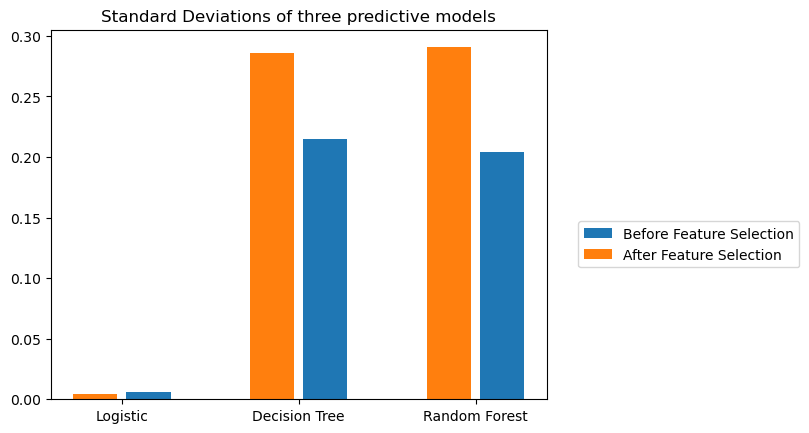

In [156]:
print('Here are the standard deviations of 20 times experiment of the models which fill missing values with mean value:')
print()
print('The standard deviations of Logistic Regression before feature selection is %.2f' %np.std(log_mean_before_l))
print('The standard deviations of Logistic Regression after feature selection is %.2f' %np.std(log_mean_after_l))
print()
print('The standard deviations of Decision Tree before feature selection is %.2f' %np.std(tree_mean_before_l))
print('The standard deviations of Decision Tree after feature selection is %.2f' %np.std(tree_mean_after_l))
print()
print('The standard deviations of Random Forest before feature selection is %.2f' %np.std(RF_mean_before_l))
print('The standard deviations of Random Forest after feature selection is %.2f' %np.std(RF_mean_after_l))

x = np.arange(3)

plt.bar(x + 0.15, [np.std(log_mean_before_l), np.std(tree_mean_before_l), np.std(RF_mean_before_l)], width=0.25, label='Logistic')
plt.bar(x - 0.15, [np.std(log_mean_after_l), np.std(tree_mean_after_l), np.std(RF_mean_after_l)], width=0.25, label='Random Forest')
plt.xticks(x, ['Logistic', 'Decision Tree', 'Random Forest'])
plt.legend(['Before Feature Selection', 'After Feature Selection'], bbox_to_anchor=(1.05, 0.5))
plt.title('Standard Deviations of three predictive models')
plt.show()

Here are the standard deviations of 10 times experiment of the models which fill missing values with median value:

The standard deviations of Logistic Regression before feature selection is 0.01
The standard deviations of Logistic Regression after feature selection is 0.01

The standard deviations of Decision Tree before feature selection is 0.01
The standard deviations of Decision Tree after feature selection is 0.03

The standard deviations of Random Forest before feature selection is 0.00
The standard deviations of Random Forest after feature selection is 0.01


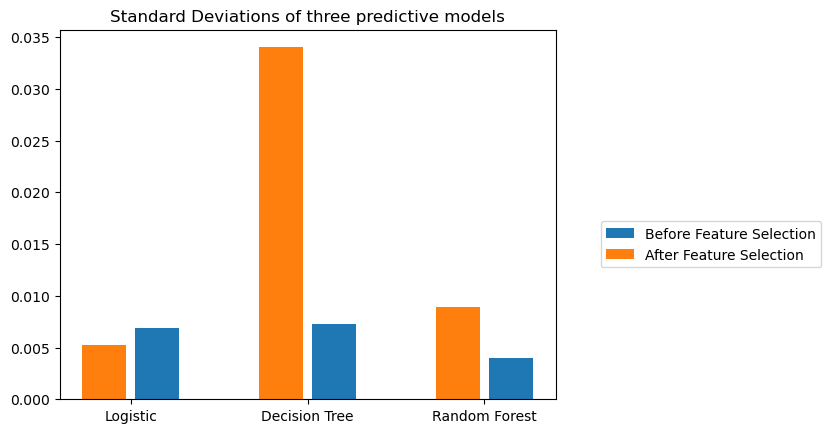

In [167]:
print('Here are the standard deviations of 20 times experiment of the models which fill missing values with median value:')
print()
print('The standard deviations of Logistic Regression before feature selection is %.2f' %np.std(log_median_before_l))
print('The standard deviations of Logistic Regression after feature selection is %.2f' %np.std(log_median_after_l))
print()
print('The standard deviations of Decision Tree before feature selection is %.2f' %np.std(tree_median_before_l))
print('The standard deviations of Decision Tree after feature selection is %.2f' %np.std(tree_median_after_l))
print()
print('The standard deviations of Random Forest before feature selection is %.2f' %np.std(RF_median_before_l))
print('The standard deviations of Random Forest after feature selection is %.2f' %np.std(RF_median_after_l))

x = np.arange(3)

plt.bar(x + 0.15, [np.std(log_median_before_l), np.std(tree_median_before_l), np.std(RF_median_before_l)], width=0.25, label='Logistic')
plt.bar(x - 0.15, [np.std(log_median_after_l), np.std(tree_median_after_l), np.std(RF_median_after_l)], width=0.25, label='Random Forest')
plt.xticks(x, ['Logistic', 'Decision Tree', 'Random Forest'])
plt.legend(['Before Feature Selection', 'After Feature Selection'], bbox_to_anchor=(1.55, 0.5))
plt.title('Standard Deviations of three predictive models')
plt.show()